In [2]:
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras import backend as K

In [3]:
# 특정 클래스에 대한 정밀도
def single_class_precision(interesting_class_id):
    def prec(y_true, y_pred):
        class_id_true = K.argmax(y_true, axis=-1)
        class_id_pred = K.argmax(y_pred, axis=-1)
        precision_mask = K.cast(K.equal(class_id_pred, interesting_class_id), 'int32')
        class_prec_tensor = K.cast(K.equal(class_id_true, class_id_pred), 'int32') * precision_mask
        class_prec = K.cast(K.sum(class_prec_tensor), 'float32') / K.cast(K.maximum(K.sum(precision_mask), 1), 'float32')
        return class_prec
    return prec

In [4]:
# 특정 클래스에 대한 재현율
def single_class_recall(interesting_class_id):
    def recall(y_true, y_pred):
        class_id_true = K.argmax(y_true, axis=-1)
        class_id_pred = K.argmax(y_pred, axis=-1)
        recall_mask = K.cast(K.equal(class_id_true, interesting_class_id), 'int32')
        class_recall_tensor = K.cast(K.equal(class_id_true, class_id_pred), 'int32') * recall_mask
        class_recall = K.cast(K.sum(class_recall_tensor), 'float32') / K.cast(K.maximum(K.sum(recall_mask), 1), 'float32')
        return class_recall
    return recall

In [5]:
# 데이터 셋 생성
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(60000, 784).astype('float32') / 255.0
X_test = X_test.reshape(10000, 784).astype('float32') / 255.0
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

    8192/11490434 [..............................] - ETA: 9:56

   16384/11490434 [..............................] - ETA: 8:32

   40960/11490434 [..............................] - ETA: 5:19

   57344/11490434 [..............................] - ETA: 4:49

   90112/11490434 [..............................] - ETA: 3:42

  122880/11490434 [..............................] - ETA: 3:10

  163840/11490434 [..............................] - ETA: 2:37

  212992/11490434 [..............................] - ETA: 2:21

  245760/11490434 [..............................] - ETA: 2:21

  278528/11490434 [..............................] - ETA: 2:16

  319488/11490434 [..............................] - ETA: 2:06

  368640/11490434 [..............................] - ETA: 2:01

  401408/11490434 [>.............................] - ETA: 1:59

  458752/11490434 [>.............................] - ETA: 1:51

  491520/11490434 [>.............................] - ETA: 1:50

  540672/11490434 [>.............................] - ETA: 1:44

  598016/11490434 [>.............................] - ETA: 1:37

  647168/11490434 [>.............................] - ETA: 1:36

  720896/11490434 [>.............................] - ETA: 1:29

  786432/11490434 [=>............................] - ETA: 1:24

  860160/11490434 [=>............................] - ETA: 1:19

  925696/11490434 [=>............................] - ETA: 1:15

 1015808/11490434 [=>............................] - ETA: 1:09

 1032192/11490434 [=>............................] - ETA: 1:09

 1114112/11490434 [=>............................] - ETA: 1:05

 1204224/11490434 [==>...........................] - ETA: 1:01

 1220608/11490434 [==>...........................] - ETA: 1:01

 1327104/11490434 [==>...........................] - ETA: 56s 

 1343488/11490434 [==>...........................] - ETA: 56s

 1449984/11490434 [==>...........................] - ETA: 52s

 1466368/11490434 [==>...........................] - ETA: 52s

 1589248/11490434 [===>..........................] - ETA: 49s

 1728512/11490434 [===>..........................] - ETA: 45s

 1884160/11490434 [===>..........................] - ETA: 42s

 1900544/11490434 [===>..........................] - ETA: 42s

 2056192/11490434 [====>.........................] - ETA: 39s

 2228224/11490434 [====>.........................] - ETA: 36s

 2252800/11490434 [====>.........................] - ETA: 36s

 2424832/11490434 [=====>........................] - ETA: 33s

 2441216/11490434 [=====>........................] - ETA: 33s

 2646016/11490434 [=====>........................] - ETA: 30s

 2875392/11490434 [======>.......................] - ETA: 28s

 2891776/11490434 [======>.......................] - ETA: 28s

 3121152/11490434 [=======>......................] - ETA: 25s

 3137536/11490434 [=======>......................] - ETA: 25s

 3399680/11490434 [=======>......................] - ETA: 23s

 3416064/11490434 [=======>......................] - ETA: 23s

 3678208/11490434 [========>.....................] - ETA: 21s

 3694592/11490434 [========>.....................] - ETA: 21s

 4005888/11490434 [=========>....................] - ETA: 19s

 4022272/11490434 [=========>....................] - ETA: 19s

 4341760/11490434 [==========>...................] - ETA: 17s

 4358144/11490434 [==========>...................] - ETA: 17s

 4702208/11490434 [===========>..................] - ETA: 15s

 4718592/11490434 [===========>..................] - ETA: 15s

 5087232/11490434 [============>.................] - ETA: 13s

 5210112/11490434 [============>.................] - ETA: 13s

 5488640/11490434 [=============>................] - ETA: 12s

 5505024/11490434 [=============>................] - ETA: 12s

 5627904/11490434 [=============>................] - ETA: 11s

 5906432/11490434 [==============>...............] - ETA: 10s

 5922816/11490434 [==============>...............] - ETA: 10s

 6062080/11490434 [==============>...............] - ETA: 10s

 6340608/11490434 [===============>..............] - ETA: 9s 

 6356992/11490434 [===============>..............] - ETA: 9s

 6512640/11490434 [================>.............] - ETA: 8s

 6823936/11490434 [================>.............] - ETA: 8s

 6848512/11490434 [================>.............] - ETA: 8s

 7020544/11490434 [=================>............] - ETA: 7s

 7331840/11490434 [==================>...........] - ETA: 6s

 7348224/11490434 [==================>...........] - ETA: 6s

 7520256/11490434 [==================>...........] - ETA: 6s

 7856128/11490434 [===================>..........] - ETA: 5s

 7888896/11490434 [===================>..........] - ETA: 5s

 8077312/11490434 [====================>.........] - ETA: 5s

 8445952/11490434 [=====================>........] - ETA: 4s

 8495104/11490434 [=====================>........] - ETA: 4s

 8675328/11490434 [=====================>........] - ETA: 4s

 9052160/11490434 [======================>.......] - ETA: 3s

 9101312/11490434 [======================>.......] - ETA: 3s

 9297920/11490434 [=======================>......] - ETA: 3s

 9723904/11490434 [========================>.....] - ETA: 2s

 9773056/11490434 [========================>.....] - ETA: 2s

 9986048/11490434 [=========================>....] - ETA: 1s

10428416/11490434 [==========================>...] - ETA: 1s

10461184/11490434 [==========================>...] - ETA: 1s

10706944/11490434 [==========================>...] - ETA: 0s

11132928/11490434 [============================>.] - ETA: 0s

11198464/11490434 [============================>.] - ETA: 0s

11460608/11490434 [============================>.] - ETA: 0s

11493376/11490434 [==============================] - 13s 1us/step


In [6]:
# 모델 구성
model = Sequential()
model.add(Dense(units=64, input_dim=28*28, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

In [7]:
# 모델 학습과정 설정
model.compile(loss='categorical_crossentropy', optimizer='sgd', 
              metrics=['accuracy',
                       single_class_precision(0), single_class_recall(0),
                       single_class_precision(1), single_class_recall(1),
                       single_class_precision(2), single_class_recall(2),
                       single_class_precision(3), single_class_recall(3),
                       single_class_precision(4), single_class_recall(4),
                       single_class_precision(5), single_class_recall(5),
                       single_class_precision(6), single_class_recall(6),
                       single_class_precision(7), single_class_recall(7),
                       single_class_precision(8), single_class_recall(8),
                       single_class_precision(9), single_class_recall(9)])

In [10]:
# 모델 학습
hist = model.fit(X_train, y_train, epochs=5, batch_size=32)

Epoch 1/5


   32/60000 [..............................] - ETA: 8:14 - loss: 2.3851 - acc: 0.0312 - prec: 0.0000e+00 - recall: 0.0000e+00 - prec_1: 0.0000e+00 - recall_1: 0.0000e+00 - prec_2: 0.0000e+00 - recall_2: 0.0000e+00 - prec_3: 0.0000e+00 - recall_3: 0.0000e+00 - prec_4: 0.1111 - recall_4: 0.2000 - prec_5: 0.0000e+00 - recall_5: 0.0000e+00 - prec_6: 0.0000e+00 - recall_6: 0.0000e+00 - prec_7: 0.0000e+00 - recall_7: 0.0000e+00 - prec_8: 0.0000e+00 - recall_8: 0.0000e+00 - prec_9: 0.0000e+00 - recall_9: 0.0000e+00

  928/60000 [..............................] - ETA: 20s - loss: 2.2813 - acc: 0.1272 - prec: 0.3682 - recall: 0.2676 - prec_1: 0.1194 - recall_1: 0.1708 - prec_2: 0.0345 - recall_2: 0.0057 - prec_3: 0.0431 - recall_3: 0.0201 - prec_4: 0.1358 - recall_4: 0.2629 - prec_5: 0.0726 - recall_5: 0.3224 - prec_6: 0.0115 - recall_6: 0.0345 - prec_7: 0.0460 - recall_7: 0.0345 - prec_8: 0.1287 - recall_8: 0.0891 - prec_9: 0.1149 - recall_9: 0.0730                                                                         

 1792/60000 [..............................] - ETA: 11s - loss: 2.1833 - acc: 0.2271 - prec: 0.4810 - recall: 0.4574 - prec_1: 0.2826 - recall_1: 0.4324 - prec_2: 0.2042 - recall_2: 0.1220 - prec_3: 0.0908 - recall_3: 0.0597 - prec_4: 0.1644 - recall_4: 0.2567 - prec_5: 0.1319 - recall_5: 0.3988 - prec_6: 0.1392 - recall_6: 0.1083 - prec_7: 0.1488 - recall_7: 0.0854 - prec_8: 0.1208 - recall_8: 0.0943 - prec_9: 0.2301 - recall_9: 0.1679

 2624/60000 [>.............................] - ETA: 9s - loss: 2.0849 - acc: 0.3102 - prec: 0.5329 - recall: 0.5727 - prec_1: 0.4155 - recall_1: 0.5654 - prec_2: 0.3093 - recall_2: 0.1861 - prec_3: 0.1839 - recall_3: 0.1245 - prec_4: 0.2181 - recall_4: 0.2914 - prec_5: 0.1899 - recall_5: 0.4180 - prec_6: 0.2660 - recall_6: 0.2498 - prec_7: 0.1992 - recall_7: 0.1162 - prec_8: 0.1638 - recall_8: 0.1183 - prec_9: 0.2861 - recall_9: 0.2520 

 3520/60000 [>.............................] - ETA: 7s - loss: 1.9804 - acc: 0.3884 - prec: 0.5688 - recall: 0.6414 - prec_1: 0.4689 - recall_1: 0.6343 - prec_2: 0.4245 - recall_2: 0.2593 - prec_3: 0.2732 - recall_3: 0.2190 - prec_4: 0.3203 - recall_4: 0.3714 - prec_5: 0.2396 - recall_5: 0.4222 - prec_6: 0.3753 - recall_6: 0.4114 - prec_7: 0.2921 - recall_7: 0.1886 - prec_8: 0.2012 - recall_8: 0.1561 - prec_9: 0.3551 - recall_9: 0.3391

 4416/60000 [=>............................] - ETA: 6s - loss: 1.8843 - acc: 0.4445 - prec: 0.5951 - recall: 0.6953 - prec_1: 0.5088 - recall_1: 0.6966 - prec_2: 0.4903 - recall_2: 0.3320 - prec_3: 0.3266 - recall_3: 0.3222 - prec_4: 0.3722 - recall_4: 0.4089 - prec_5: 0.2948 - recall_5: 0.4066 - prec_6: 0.4337 - recall_6: 0.4728 - prec_7: 0.3944 - recall_7: 0.2516 - prec_8: 0.2377 - recall_8: 0.1615 - prec_9: 0.3828 - recall_9: 0.4111

 5184/60000 [=>............................] - ETA: 6s - loss: 1.8162 - acc: 0.4776 - prec: 0.6032 - recall: 0.7237 - prec_1: 0.5379 - recall_1: 0.7298 - prec_2: 0.5420 - recall_2: 0.3676 - prec_3: 0.3632 - recall_3: 0.3765 - prec_4: 0.4007 - recall_4: 0.4231 - prec_5: 0.3439 - recall_5: 0.4133 - prec_6: 0.4830 - recall_6: 0.5293 - prec_7: 0.4392 - recall_7: 0.2926 - prec_8: 0.2894 - recall_8: 0.1996 - prec_9: 0.3957 - recall_9: 0.4505

 6080/60000 [==>...........................] - ETA: 5s - loss: 1.7377 - acc: 0.5138 - prec: 0.6314 - recall: 0.7527 - prec_1: 0.5673 - recall_1: 0.7673 - prec_2: 0.5854 - recall_2: 0.4242 - prec_3: 0.4096 - recall_3: 0.4171 - prec_4: 0.4264 - recall_4: 0.4116 - prec_5: 0.4099 - recall_5: 0.4363 - prec_6: 0.5273 - recall_6: 0.5778 - prec_7: 0.4839 - recall_7: 0.3326 - prec_8: 0.3392 - recall_8: 0.2790 - prec_9: 0.4182 - recall_9: 0.4908

 7200/60000 [==>...........................] - ETA: 4s - loss: 1.6481 - acc: 0.5532 - prec: 0.6590 - recall: 0.7705 - prec_1: 0.5940 - recall_1: 0.7922 - prec_2: 0.6115 - recall_2: 0.4705 - prec_3: 0.4556 - recall_3: 0.4735 - prec_4: 0.4741 - recall_4: 0.4602 - prec_5: 0.4319 - recall_5: 0.4457 - prec_6: 0.5604 - recall_6: 0.6185 - prec_7: 0.5209 - recall_7: 0.3809 - prec_8: 0.4113 - recall_8: 0.3493 - prec_9: 0.4514 - recall_9: 0.5040

 8352/60000 [===>..........................] - ETA: 4s - loss: 1.5708 - acc: 0.5821 - prec: 0.6773 - recall: 0.7734 - prec_1: 0.6202 - recall_1: 0.8133 - prec_2: 0.6437 - recall_2: 0.5175 - prec_3: 0.4827 - recall_3: 0.5112 - prec_4: 0.5006 - recall_4: 0.4841 - prec_5: 0.4557 - recall_5: 0.4355 - prec_6: 0.5822 - recall_6: 0.6362 - prec_7: 0.5423 - recall_7: 0.4228 - prec_8: 0.4463 - recall_8: 0.3876 - prec_9: 0.4762 - recall_9: 0.5382

 9536/60000 [===>..........................] - ETA: 4s - loss: 1.4937 - acc: 0.6094 - prec: 0.7022 - recall: 0.7886 - prec_1: 0.6429 - recall_1: 0.8253 - prec_2: 0.6585 - recall_2: 0.5466 - prec_3: 0.5121 - recall_3: 0.5471 - prec_4: 0.5290 - recall_4: 0.5047 - prec_5: 0.4857 - recall_5: 0.4472 - prec_6: 0.6082 - recall_6: 0.6694 - prec_7: 0.5762 - recall_7: 0.4581 - prec_8: 0.4853 - recall_8: 0.4299 - prec_9: 0.4992 - recall_9: 0.5662

10688/60000 [====>.........................] - ETA: 3s - loss: 1.4309 - acc: 0.6292 - prec: 0.7243 - recall: 0.8000 - prec_1: 0.6614 - recall_1: 0.8422 - prec_2: 0.6795 - recall_2: 0.5727 - prec_3: 0.5302 - recall_3: 0.5746 - prec_4: 0.5495 - recall_4: 0.5343 - prec_5: 0.5169 - recall_5: 0.4596 - prec_6: 0.6312 - recall_6: 0.6930 - prec_7: 0.6085 - recall_7: 0.5011 - prec_8: 0.5216 - recall_8: 0.4565 - prec_9: 0.5153 - recall_9: 0.5719

11776/60000 [====>.........................] - ETA: 3s - loss: 1.3784 - acc: 0.6457 - prec: 0.7334 - recall: 0.8077 - prec_1: 0.6769 - recall_1: 0.8488 - prec_2: 0.6915 - recall_2: 0.5873 - prec_3: 0.5519 - recall_3: 0.6057 - prec_4: 0.5646 - recall_4: 0.5503 - prec_5: 0.5347 - recall_5: 0.4693 - prec_6: 0.6457 - recall_6: 0.7090 - prec_7: 0.6235 - recall_7: 0.5190 - prec_8: 0.5482 - recall_8: 0.4826 - prec_9: 0.5324 - recall_9: 0.5801

12672/60000 [=====>........................] - ETA: 3s - loss: 1.3349 - acc: 0.6589 - prec: 0.7440 - recall: 0.8148 - prec_1: 0.6874 - recall_1: 0.8563 - prec_2: 0.7044 - recall_2: 0.6069 - prec_3: 0.5706 - recall_3: 0.6195 - prec_4: 0.5858 - recall_4: 0.5611 - prec_5: 0.5486 - recall_5: 0.4775 - prec_6: 0.6578 - recall_6: 0.7221 - prec_7: 0.6415 - recall_7: 0.5293 - prec_8: 0.5654 - recall_8: 0.5014 - prec_9: 0.5453 - recall_9: 0.6011

13600/60000 [=====>........................] - ETA: 3s - loss: 1.2951 - acc: 0.6711 - prec: 0.7545 - recall: 0.8226 - prec_1: 0.6946 - recall_1: 0.8602 - prec_2: 0.7143 - recall_2: 0.6166 - prec_3: 0.5805 - recall_3: 0.6258 - prec_4: 0.6049 - recall_4: 0.5789 - prec_5: 0.5605 - recall_5: 0.4879 - prec_6: 0.6723 - recall_6: 0.7316 - prec_7: 0.6510 - recall_7: 0.5469 - prec_8: 0.5808 - recall_8: 0.5196 - prec_9: 0.5582 - recall_9: 0.6085

14560/60000 [======>.......................] - ETA: 3s - loss: 1.2586 - acc: 0.6805 - prec: 0.7665 - recall: 0.8330 - prec_1: 0.7025 - recall_1: 0.8648 - prec_2: 0.7170 - recall_2: 0.6214 - prec_3: 0.5881 - recall_3: 0.6360 - prec_4: 0.6209 - recall_4: 0.5930 - prec_5: 0.5760 - recall_5: 0.4955 - prec_6: 0.6837 - recall_6: 0.7417 - prec_7: 0.6643 - recall_7: 0.5653 - prec_8: 0.5903 - recall_8: 0.5266 - prec_9: 0.5654 - recall_9: 0.6172

15488/60000 [======>.......................] - ETA: 3s - loss: 1.2239 - acc: 0.6911 - prec: 0.7738 - recall: 0.8356 - prec_1: 0.7153 - recall_1: 0.8714 - prec_2: 0.7240 - recall_2: 0.6331 - prec_3: 0.6006 - recall_3: 0.6463 - prec_4: 0.6309 - recall_4: 0.6066 - prec_5: 0.5952 - recall_5: 0.5089 - prec_6: 0.6886 - recall_6: 0.7476 - prec_7: 0.6787 - recall_7: 0.5822 - prec_8: 0.6031 - recall_8: 0.5432 - prec_9: 0.5757 - recall_9: 0.6285

16512/60000 [=======>......................] - ETA: 2s - loss: 1.1917 - acc: 0.7000 - prec: 0.7805 - recall: 0.8422 - prec_1: 0.7244 - recall_1: 0.8782 - prec_2: 0.7315 - recall_2: 0.6431 - prec_3: 0.6136 - recall_3: 0.6566 - prec_4: 0.6402 - recall_4: 0.6146 - prec_5: 0.6020 - recall_5: 0.5164 - prec_6: 0.7019 - recall_6: 0.7600 - prec_7: 0.6892 - recall_7: 0.5953 - prec_8: 0.6124 - recall_8: 0.5589 - prec_9: 0.5851 - recall_9: 0.6401

17504/60000 [=======>......................] - ETA: 2s - loss: 1.1607 - acc: 0.7086 - prec: 0.7852 - recall: 0.8460 - prec_1: 0.7303 - recall_1: 0.8822 - prec_2: 0.7376 - recall_2: 0.6530 - prec_3: 0.6266 - recall_3: 0.6644 - prec_4: 0.6499 - recall_4: 0.6264 - prec_5: 0.6164 - recall_5: 0.5288 - prec_6: 0.7137 - recall_6: 0.7668 - prec_7: 0.6992 - recall_7: 0.6073 - prec_8: 0.6194 - recall_8: 0.5666 - prec_9: 0.5904 - recall_9: 0.6491

18528/60000 [========>.....................] - ETA: 2s - loss: 1.1319 - acc: 0.7166 - prec: 0.7897 - recall: 0.8486 - prec_1: 0.7368 - recall_1: 0.8845 - prec_2: 0.7446 - recall_2: 0.6644 - prec_3: 0.6357 - recall_3: 0.6681 - prec_4: 0.6571 - recall_4: 0.6354 - prec_5: 0.6230 - recall_5: 0.5364 - prec_6: 0.7197 - recall_6: 0.7715 - prec_7: 0.7074 - recall_7: 0.6239 - prec_8: 0.6339 - recall_8: 0.5830 - prec_9: 0.6020 - recall_9: 0.6543

19648/60000 [========>.....................] - ETA: 2s - loss: 1.1030 - acc: 0.7233 - prec: 0.7952 - recall: 0.8516 - prec_1: 0.7425 - recall_1: 0.8875 - prec_2: 0.7451 - recall_2: 0.6670 - prec_3: 0.6460 - recall_3: 0.6788 - prec_4: 0.6649 - recall_4: 0.6488 - prec_5: 0.6247 - recall_5: 0.5343 - prec_6: 0.7242 - recall_6: 0.7749 - prec_7: 0.7180 - recall_7: 0.6355 - prec_8: 0.6394 - recall_8: 0.5938 - prec_9: 0.6127 - recall_9: 0.6618

20736/60000 [=========>....................] - ETA: 2s - loss: 1.0760 - acc: 0.7305 - prec: 0.7971 - recall: 0.8530 - prec_1: 0.7515 - recall_1: 0.8920 - prec_2: 0.7509 - recall_2: 0.6740 - prec_3: 0.6500 - recall_3: 0.6880 - prec_4: 0.6756 - recall_4: 0.6583 - prec_5: 0.6352 - recall_5: 0.5399 - prec_6: 0.7310 - recall_6: 0.7811 - prec_7: 0.7257 - recall_7: 0.6476 - prec_8: 0.6470 - recall_8: 0.6025 - prec_9: 0.6219 - recall_9: 0.6699

21664/60000 [=========>....................] - ETA: 2s - loss: 1.0557 - acc: 0.7362 - prec: 0.8009 - recall: 0.8565 - prec_1: 0.7584 - recall_1: 0.8940 - prec_2: 0.7559 - recall_2: 0.6802 - prec_3: 0.6590 - recall_3: 0.6929 - prec_4: 0.6845 - recall_4: 0.6687 - prec_5: 0.6453 - recall_5: 0.5503 - prec_6: 0.7366 - recall_6: 0.7863 - prec_7: 0.7275 - recall_7: 0.6512 - prec_8: 0.6517 - recall_8: 0.6092 - prec_9: 0.6301 - recall_9: 0.6767

22560/60000 [==========>...................] - ETA: 2s - loss: 1.0373 - acc: 0.7405 - prec: 0.8058 - recall: 0.8559 - prec_1: 0.7639 - recall_1: 0.8971 - prec_2: 0.7573 - recall_2: 0.6851 - prec_3: 0.6646 - recall_3: 0.6982 - prec_4: 0.6894 - recall_4: 0.6752 - prec_5: 0.6492 - recall_5: 0.5555 - prec_6: 0.7357 - recall_6: 0.7865 - prec_7: 0.7325 - recall_7: 0.6560 - prec_8: 0.6513 - recall_8: 0.6086 - prec_9: 0.6341 - recall_9: 0.6806

23520/60000 [==========>...................] - ETA: 2s - loss: 1.0211 - acc: 0.7442 - prec: 0.8077 - recall: 0.8568 - prec_1: 0.7651 - recall_1: 0.8968 - prec_2: 0.7577 - recall_2: 0.6836 - prec_3: 0.6696 - recall_3: 0.7019 - prec_4: 0.6938 - recall_4: 0.6831 - prec_5: 0.6549 - recall_5: 0.5569 - prec_6: 0.7397 - recall_6: 0.7925 - prec_7: 0.7392 - recall_7: 0.6639 - prec_8: 0.6578 - recall_8: 0.6155 - prec_9: 0.6394 - recall_9: 0.6865

24544/60000 [===========>..................] - ETA: 2s - loss: 1.0004 - acc: 0.7493 - prec: 0.8114 - recall: 0.8596 - prec_1: 0.7700 - recall_1: 0.8993 - prec_2: 0.7613 - recall_2: 0.6901 - prec_3: 0.6758 - recall_3: 0.7075 - prec_4: 0.7010 - recall_4: 0.6882 - prec_5: 0.6565 - recall_5: 0.5587 - prec_6: 0.7448 - recall_6: 0.7958 - prec_7: 0.7447 - recall_7: 0.6705 - prec_8: 0.6639 - recall_8: 0.6246 - prec_9: 0.6460 - recall_9: 0.6928

25632/60000 [===========>..................]

 - ETA: 2s - loss: 0.9826 - acc: 0.7536 - prec: 0.8122 - recall: 0.8600 - prec_1: 0.7711 - recall_1: 0.8988 - prec_2: 0.7619 - recall_2: 0.6941 - prec_3: 0.6813 - recall_3: 0.7104 - prec_4: 0.7079 - recall_4: 0.6938 - prec_5: 0.6633 - recall_5: 0.5665 - prec_6: 0.7493 - recall_6: 0.7998 - prec_7: 0.7486 - recall_7: 0.6782 - prec_8: 0.6696 - recall_8: 0.6284 - prec_9: 0.6516 - recall_9: 0.7017

26560/60000 [============>.................] - ETA: 2s - loss: 0.9674 - acc: 0.7572 - prec: 0.8161 - recall: 0.8636 - prec_1: 0.7735 - recall_1: 0.9001 - prec_2: 0.7640 - recall_2: 0.6977 - prec_3: 0.6862 - recall_3: 0.7162 - prec_4: 0.7115 - recall_4: 0.6972 - prec_5: 0.6676 - recall_5: 0.5689 - prec_6: 0.7530 - recall_6: 0.8013 - prec_7: 0.7548 - recall_7: 0.6855 - prec_8: 0.6702 - recall_8: 0.6300 - prec_9: 0.6576 - recall_9: 0.7086

27552/60000 [============>.................] - ETA: 1s - loss: 0.9507 - acc: 0.7611 - prec: 0.8165 - recall: 0.8647 - prec_1: 0.7787 - recall_1: 0.9024 - prec_2: 0.7672 - recall_2: 0.7018 - prec_3: 0.6895 - recall_3: 0.7170 - prec_4: 0.7163 - recall_4: 0.7020 - prec_5: 0.6672 - recall_5: 0.5699 - prec_6: 0.7576 - recall_6: 0.8052 - prec_7: 0.7600 - recall_7: 0.6931 - prec_8: 0.6753 - recall_8: 0.6363 - prec_9: 0.6627 - recall_9: 0.7146

28512/60000 [=============>................] - ETA: 1s - loss: 0.9370 - acc: 0.7641 - prec: 0.8158 - recall: 0.8638 - prec_1: 0.7817 - recall_1: 0.9031 - prec_2: 0.7713 - recall_2: 0.7055 - prec_3: 0.6938 - recall_3: 0.7202 - prec_4: 0.7220 - recall_4: 0.7055 - prec_5: 0.6699 - recall_5: 0.5735 - prec_6: 0.7620 - recall_6: 0.8091 - prec_7: 0.7645 - recall_7: 0.6997 - prec_8: 0.6805 - recall_8: 0.6423 - prec_9: 0.6641 - recall_9: 0.7183

29536/60000 [=============>................] - ETA: 1s - loss: 0.9224 - acc: 0.7673 - prec: 0.8189 - recall: 0.8663 - prec_1: 0.7849 - recall_1: 0.9044 - prec_2: 0.7730 - recall_2: 0.7070 - prec_3: 0.6981 - recall_3: 0.7241 - prec_4: 0.7257 - recall_4: 0.7120 - prec_5: 0.6713 - recall_5: 0.5763 - prec_6: 0.7670 - recall_6: 0.8144 - prec_7: 0.7683 - recall_7: 0.7048 - prec_8: 0.6830 - recall_8: 0.6460 - prec_9: 0.6676 - recall_9: 0.7187

30496/60000 [==============>...............] - ETA: 1s - loss: 0.9099 - acc: 0.7705 - prec: 0.8197 - recall: 0.8668 - prec_1: 0.7894 - recall_1: 0.9061 - prec_2: 0.7761 - recall_2: 0.7106 - prec_3: 0.6998 - recall_3: 0.7259 - prec_4: 0.7299 - recall_4: 0.7166 - prec_5: 0.6754 - recall_5: 0.5819 - prec_6: 0.7696 - recall_6: 0.8166 - prec_7: 0.7711 - recall_7: 0.7088 - prec_8: 0.6854 - recall_8: 0.6498 - prec_9: 0.6707 - recall_9: 0.7199

31424/60000 [==============>...............] - ETA: 1s - loss: 0.8976 - acc: 0.7734 - prec: 0.8212 - recall: 0.8690 - prec_1: 0.7926 - recall_1: 0.9069 - prec_2: 0.7775 - recall_2: 0.7127 - prec_3: 0.7008 - recall_3: 0.7257 - prec_4: 0.7331 - recall_4: 0.7191 - prec_5: 0.6813 - recall_5: 0.5872 - prec_6: 0.7702 - recall_6: 0.8166 - prec_7: 0.7761 - recall_7: 0.7152 - prec_8: 0.6879 - recall_8: 0.6537 - prec_9: 0.6767 - recall_9: 0.7254

32416/60000 [===============>..............] - ETA: 1s - loss: 0.8859 - acc: 0.7762 - prec: 0.8237 - recall: 0.8695 - prec_1: 0.7953 - recall_1: 0.9081 - prec_2: 0.7786 - recall_2: 0.7166 - prec_3: 0.7022 - recall_3: 0.7257 - prec_4: 0.7345 - recall_4: 0.7193 - prec_5: 0.6852 - recall_5: 0.5931 - prec_6: 0.7724 - recall_6: 0.8184 - prec_7: 0.7795 - recall_7: 0.7185 - prec_8: 0.6933 - recall_8: 0.6590 - prec_9: 0.6800 - recall_9: 0.7285

33440/60000 [===============>..............] - ETA: 1s - loss: 0.8739 - acc: 0.7791 - prec: 0.8265 - recall: 0.8709 - prec_1: 0.7980 - recall_1: 0.9092 - prec_2: 0.7811 - recall_2: 0.7216 - prec_3: 0.7077 - recall_3: 0.7298 - prec_4: 0.7399 - recall_4: 0.7230 - prec_5: 0.6900 - recall_5: 0.5974 - prec_6: 0.7761 - recall_6: 0.8203 - prec_7: 0.7842 - recall_7: 0.7237 - prec_8: 0.6934 - recall_8: 0.6605 - prec_9: 0.6823 - recall_9: 0.7318

34464/60000 [================>.............] - ETA: 1s - loss: 0.8623 - acc: 0.7821 - prec: 0.8288 - recall: 0.8728 - prec_1: 0.8010 - recall_1: 0.9097 - prec_2: 0.7849 - recall_2: 0.7251 - prec_3: 0.7114 - recall_3: 0.7332 - prec_4: 0.7437 - recall_4: 0.7287 - prec_5: 0.6959 - recall_5: 0.6018 - prec_6: 0.7806 - recall_6: 0.8241 - prec_7: 0.7859 - recall_7: 0.7279 - prec_8: 0.6936 - recall_8: 0.6639 - prec_9: 0.6877 - recall_9: 0.7349

35456/60000 [================>.............] - ETA: 1s - loss: 0.8523 - acc: 0.7844 - prec: 0.8315 - recall: 0.8737 - prec_1: 0.8026 - recall_1: 0.9106 - prec_2: 0.7867 - recall_2: 0.7281 - prec_3: 0.7121 - recall_3: 0.7327 - prec_4: 0.7469 - recall_4: 0.7332 - prec_5: 0.6980 - recall_5: 0.6066 - prec_6: 0.7828 - recall_6: 0.8273 - prec_7: 0.7873 - recall_7: 0.7299 - prec_8: 0.6963 - recall_8: 0.6659 - prec_9: 0.6904 - recall_9: 0.7366

36448/60000 [=================>............] - ETA: 1s - loss: 0.8421 - acc: 0.7867 - prec: 0.8341 - recall: 0.8753 - prec_1: 0.8043 - recall_1: 0.9115 - prec_2: 0.7904 - recall_2: 0.7322 - prec_3: 0.7155 - recall_3: 0.7354 - prec_4: 0.7508 - recall_4: 0.7375 - prec_5: 0.7009 - recall_5: 0.6104 - prec_6: 0.7861 - recall_6: 0.8291 - prec_7: 0.7871 - recall_7: 0.7315 - prec_8: 0.6998 - recall_8: 0.6700 - prec_9: 0.6921 - recall_9: 0.7384

37504/60000 [=================>............] - ETA: 1s - loss: 0.8309 - acc: 0.7892 - prec: 0.8359 - recall: 0.8761 - prec_1: 0.8076 - recall_1: 0.9127 - prec_2: 0.7902 - recall_2: 0.7336 - prec_3: 0.7205 - recall_3: 0.7391 - prec_4: 0.7515 - recall_4: 0.7414 - prec_5: 0.7036 - recall_5: 0.6134 - prec_6: 0.7889 - recall_6: 0.8314 - prec_7: 0.7909 - recall_7: 0.7342 - prec_8: 0.7028 - recall_8: 0.6737 - prec_9: 0.6950 - recall_9: 0.7405

38560/60000 [==================>...........] - ETA: 1s - loss: 0.8210 - acc: 0.7916 - prec: 0.8362 - recall: 0.8760 - prec_1: 0.8087 - recall_1: 0.9122 - prec_2: 0.7923 - recall_2: 0.7359 - prec_3: 0.7235 - recall_3: 0.7416 - prec_4: 0.7540 - recall_4: 0.7450 - prec_5: 0.7071 - recall_5: 0.6170 - prec_6: 0.7913 - recall_6: 0.8343 - prec_7: 0.7931 - recall_7: 0.7358 - prec_8: 0.7068 - recall_8: 0.6779 - prec_9: 0.6983 - recall_9: 0.7442

39520/60000 [==================>...........] - ETA: 1s - loss: 0.8117 - acc: 0.7940 - prec: 0.8379 - recall: 0.8778 - prec_1: 0.8112 - recall_1: 0.9129 - prec_2: 0.7937 - recall_2: 0.7377 - prec_3: 0.7245 - recall_3: 0.7409 - prec_4: 0.7582 - recall_4: 0.7498 - prec_5: 0.7113 - recall_5: 0.6223 - prec_6: 0.7949 - recall_6: 0.8371 - prec_7: 0.7963 - recall_7: 0.7406 - prec_8: 0.7094 - recall_8: 0.6801 - prec_9: 0.7007 - recall_9: 0.7465

40576/60000 [===================>..........] - ETA: 1s - loss: 0.8021 - acc: 0.7961 - prec: 0.8370 - recall: 0.8773 - prec_1: 0.8123 - recall_1: 0.9132 - prec_2: 0.7944 - recall_2: 0.7386 - prec_3: 0.7263 - recall_3: 0.7422 - prec_4: 0.7601 - recall_4: 0.7537 - prec_5: 0.7135 - recall_5: 0.6260 - prec_6: 0.7970 - recall_6: 0.8393 - prec_7: 0.7988 - recall_7: 0.7437 - prec_8: 0.7101 - recall_8: 0.6806 - prec_9: 0.7054 - recall_9: 0.7490

41472/60000 [===================>..........] - ETA: 1s - loss: 0.7944 - acc: 0.7980 - prec: 0.8385 - recall: 0.8787 - prec_1: 0.8151 - recall_1: 0.9145 - prec_2: 0.7973 - recall_2: 0.7416 - prec_3: 0.7290 - recall_3: 0.7454 - prec_4: 0.7633 - recall_4: 0.7557 - prec_5: 0.7155 - recall_5: 0.6287 - prec_6: 0.7993 - recall_6: 0.8413 - prec_7: 0.8007 - recall_7: 0.7451 - prec_8: 0.7122 - recall_8: 0.6849 - prec_9: 0.7066 - recall_9: 0.7520

42432/60000 [====================>.........] - ETA: 1s - loss: 0.7857 - acc: 0.8003 - prec: 0.8408 - recall: 0.8810 - prec_1: 0.8164 - recall_1: 0.9144 - prec_2: 0.7995 - recall_2: 0.7435 - prec_3: 0.7323 - recall_3: 0.7479 - prec_4: 0.7657 - recall_4: 0.7583 - prec_5: 0.7167 - recall_5: 0.6295 - prec_6: 0.7994 - recall_6: 0.8420 - prec_7: 0.8021 - recall_7: 0.7487 - prec_8: 0.7155 - recall_8: 0.6890 - prec_9: 0.7095 - recall_9: 0.7544

43328/60000 [====================>.........] - ETA: 0s - loss: 0.7785 - acc: 0.8023 - prec: 0.8431 - recall: 0.8827 - prec_1: 0.8171 - recall_1: 0.9151 - prec_2: 0.8010 - recall_2: 0.7451 - prec_3: 0.7345 - recall_3: 0.7498 - prec_4: 0.7680 - recall_4: 0.7607 - prec_5: 0.7186 - recall_5: 0.6330 - prec_6: 0.8015 - recall_6: 0.8439 - prec_7: 0.8038 - recall_7: 0.7511 - prec_8: 0.7179 - recall_8: 0.6909 - prec_9: 0.7131 - recall_9: 0.7568

44320/60000 [=====================>........] - ETA: 0s - loss: 0.7713 - acc: 0.8039 - prec: 0.8437 - recall: 0.8818 - prec_1: 0.8186 - recall_1: 0.9155 - prec_2: 0.8016 - recall_2: 0.7475 - prec_3: 0.7377 - recall_3: 0.7527 - prec_4: 0.7699 - recall_4: 0.7637 - prec_5: 0.7187 - recall_5: 0.6350 - prec_6: 0.8036 - recall_6: 0.8455 - prec_7: 0.8068 - recall_7: 0.7548 - prec_8: 0.7213 - recall_8: 0.6940 - prec_9: 0.7128 - recall_9: 0.7562

45216/60000 [=====================>........] - ETA: 0s - loss: 0.7648 - acc: 0.8054 - prec: 0.8447 - recall: 0.8819 - prec_1: 0.8202 - recall_1: 0.9156 - prec_2: 0.8011 - recall_2: 0.7474 - prec_3: 0.7411 - recall_3: 0.7555 - prec_4: 0.7708 - recall_4: 0.7652 - prec_5: 0.7198 - recall_5: 0.6365 - prec_6: 0.8039 - recall_6: 0.8463 - prec_7: 0.8083 - recall_7: 0.7567 - prec_8: 0.7239 - recall_8: 0.6978 - prec_9: 0.7152 - recall_9: 0.7571

46144/60000 [======================>.......] - ETA: 0s - loss: 0.7583 - acc: 0.8073 - prec: 0.8451 - recall: 0.8810 - prec_1: 0.8217 - recall_1: 0.9147 - prec_2: 0.8028 - recall_2: 0.7495 - prec_3: 0.7426 - recall_3: 0.7566 - prec_4: 0.7725 - recall_4: 0.7681 - prec_5: 0.7210 - recall_5: 0.6384 - prec_6: 0.8058 - recall_6: 0.8481 - prec_7: 0.8104 - recall_7: 0.7604 - prec_8: 0.7252 - recall_8: 0.6998 - prec_9: 0.7182 - recall_9: 0.7585

47104/60000 [======================>.......] - ETA: 0s - loss: 0.7505 - acc: 0.8092 - prec: 0.8477 - recall: 0.8830 - prec_1: 0.8219 - recall_1: 0.9146 - prec_2: 0.8043 - recall_2: 0.7519 - prec_3: 0.7459 - recall_3: 0.7586 - prec_4: 0.7734 - recall_4: 0.7693 - prec_5: 0.7241 - recall_5: 0.6411 - prec_6: 0.8077 - recall_6: 0.8496 - prec_7: 0.8132 - recall_7: 0.7640 - prec_8: 0.7271 - recall_8: 0.7032 - prec_9: 0.7227 - recall_9: 0.7606

48256/60000 [=======================>......] - ETA: 0s - loss: 0.7423 - acc: 0.8109 - prec: 0.8485 - recall: 0.8845 - prec_1: 0.8240 - recall_1: 0.9152 - prec_2: 0.8064 - recall_2: 0.7549 - prec_3: 0.7484 - recall_3: 0.7607 - prec_4: 0.7760 - recall_4: 0.7722 - prec_5: 0.7248 - recall_5: 0.6432 - prec_6: 0.8104 - recall_6: 0.8511 - prec_7: 0.8156 - recall_7: 0.7665 - prec_8: 0.7271 - recall_8: 0.7030 - prec_9: 0.7241 - recall_9: 0.7620

49440/60000 [=======================>......] - ETA: 0s - loss: 0.7350 - acc: 0.8126 - prec: 0.8501 - recall: 0.8863 - prec_1: 0.8238 - recall_1: 0.9148 - prec_2: 0.8083 - recall_2: 0.7561 - prec_3: 0.7510 - recall_3: 0.7625 - prec_4: 0.7783 - recall_4: 0.7743 - prec_5: 0.7271 - recall_5: 0.6453 - prec_6: 0.8115 - recall_6: 0.8520 - prec_7: 0.8183 - recall_7: 0.7700 - prec_8: 0.7292 - recall_8: 0.7056 - prec_9: 0.7273 - recall_9: 0.7639

50624/60000 [========================>.....] - ETA: 0s - loss: 0.7276 - acc: 0.8146 - prec: 0.8499 - recall: 0.8861 - prec_1: 0.8255 - recall_1: 0.9157 - prec_2: 0.8083 - recall_2: 0.7569 - prec_3: 0.7542 - recall_3: 0.7636 - prec_4: 0.7800 - recall_4: 0.7754 - prec_5: 0.7291 - recall_5: 0.6484 - prec_6: 0.8120 - recall_6: 0.8524 - prec_7: 0.8205 - recall_7: 0.7727 - prec_8: 0.7329 - recall_8: 0.7097 - prec_9: 0.7304 - recall_9: 0.7674

51488/60000 [========================>.....] - ETA: 0s - loss: 0.7229 - acc: 0.8155 - prec: 0.8509 - recall: 0.8867 - prec_1: 0.8267 - recall_1: 0.9166 - prec_2: 0.8093 - recall_2: 0.7581 - prec_3: 0.7565 - recall_3: 0.7652 - prec_4: 0.7793 - recall_4: 0.7758 - prec_5: 0.7308 - recall_5: 0.6507 - prec_6: 0.8132 - recall_6: 0.8526 - prec_7: 0.8212 - recall_7: 0.7735 - prec_8: 0.7341 - recall_8: 0.7106 - prec_9: 0.7321 - recall_9: 0.7679

52416/60000 [=========================>....] - ETA: 0s - loss: 0.7177 - acc: 0.8165 - prec: 0.8523 - recall: 0.8880 - prec_1: 0.8276 - recall_1: 0.9173 - prec_2: 0.8102 - recall_2: 0.7589 - prec_3: 0.7582 - recall_3: 0.7666 - prec_4: 0.7805 - recall_4: 0.7787 - prec_5: 0.7321 - recall_5: 0.6527 - prec_6: 0.8138 - recall_6: 0.8522 - prec_7: 0.8225 - recall_7: 0.7757 - prec_8: 0.7352 - recall_8: 0.7128 - prec_9: 0.7323 - recall_9: 0.7679

53568/60000 [=========================>....] - ETA: 0s - loss: 0.7108 - acc: 0.8181 - prec: 0.8536 - recall: 0.8890 - prec_1: 0.8294 - recall_1: 0.9185 - prec_2: 0.8100 - recall_2: 0.7590 - prec_3: 0.7597 - recall_3: 0.7667 - prec_4: 0.7807 - recall_4: 0.7799 - prec_5: 0.7351 - recall_5: 0.6567 - prec_6: 0.8151 - recall_6: 0.8540 - prec_7: 0.8251 - recall_7: 0.7780 - prec_8: 0.7378 - recall_8: 0.7148 - prec_9: 0.7349 - recall_9: 0.7692

54752/60000 [==========================>...] - ETA: 0s - loss: 0.7040 - acc: 0.8196 - prec: 0.8552 - recall: 0.8902 - prec_1: 0.8303 - recall_1: 0.9192 - prec_2: 0.8110 - recall_2: 0.7603 - prec_3: 0.7617 - recall_3: 0.7686 - prec_4: 0.7819 - recall_4: 0.7816 - prec_5: 0.7372 - recall_5: 0.6595 - prec_6: 0.8158 - recall_6: 0.8546 - prec_7: 0.8264 - recall_7: 0.7792 - prec_8: 0.7401 - recall_8: 0.7170 - prec_9: 0.7376 - recall_9: 0.7723

55840/60000 [==========================>...] - ETA: 0s - loss: 0.6984 - acc: 0.8206 - prec: 0.8558 - recall: 0.8909 - prec_1: 0.8323 - recall_1: 0.9200 - prec_2: 0.8116 - recall_2: 0.7601 - prec_3: 0.7629 - recall_3: 0.7692 - prec_4: 0.7815 - recall_4: 0.7818 - prec_5: 0.7393 - recall_5: 0.6624 - prec_6: 0.8171 - recall_6: 0.8556 - prec_7: 0.8277 - recall_7: 0.7809 - prec_8: 0.7412 - recall_8: 0.7197 - prec_9: 0.7389 - recall_9: 0.7733

57024/60000 [===========================>..] - ETA: 0s - loss: 0.6919 - acc: 0.8223 - prec: 0.8565 - recall: 0.8913 - prec_1: 0.8337 - recall_1: 0.9205 - prec_2: 0.8128 - recall_2: 0.7620 - prec_3: 0.7662 - recall_3: 0.7715 - prec_4: 0.7803 - recall_4: 0.7810 - prec_5: 0.7394 - recall_5: 0.6638 - prec_6: 0.8181 - recall_6: 0.8562 - prec_7: 0.8273 - recall_7: 0.7816 - prec_8: 0.7432 - recall_8: 0.7224 - prec_9: 0.7418 - recall_9: 0.7755

58208/60000 [============================>.] - ETA: 0s - loss: 0.6857 - acc: 0.8236 - prec: 0.8578 - recall: 0.8929 - prec_1: 0.8349 - recall_1: 0.9209 - prec_2: 0.8123 - recall_2: 0.7634 - prec_3: 0.7694 - recall_3: 0.7738 - prec_4: 0.7808 - recall_4: 0.7809 - prec_5: 0.7426 - recall_5: 0.6666 - prec_6: 0.8186 - recall_6: 0.8562 - prec_7: 0.8290 - recall_7: 0.7837 - prec_8: 0.7458 - recall_8: 0.7255 - prec_9: 0.7430 - recall_9: 0.7768

59392/60000 [============================>.] - ETA: 0s - loss: 0.6794 - acc: 0.8251 - prec: 0.8570 - recall: 0.8922 - prec_1: 0.8358 - recall_1: 0.9214 - prec_2: 0.8134 - recall_2: 0.7646 - prec_3: 0.7704 - recall_3: 0.7745 - prec_4: 0.7836 - recall_4: 0.7835 - prec_5: 0.7451 - recall_5: 0.6698 - prec_6: 0.8207 - recall_6: 0.8585 - prec_7: 0.8302 - recall_7: 0.7860 - prec_8: 0.7467 - recall_8: 0.7247 - prec_9: 0.7466 - recall_9: 0.7796

60000/60000 [==============================] - 3s 55us/step - loss: 0.6762 - acc: 0.8259 - prec: 0.8578 - recall: 0.8929 - prec_1: 0.8374 - recall_1: 0.9222 - prec_2: 0.8138 - recall_2: 0.7658 - prec_3: 0.7713 - recall_3: 0.7744 - prec_4: 0.7841 - recall_4: 0.7840 - prec_5: 0.7459 - recall_5: 0.6719 - prec_6: 0.8214 - recall_6: 0.8592 - prec_7: 0.8303 - recall_7: 0.7872 - prec_8: 0.7466 - recall_8: 0.7255 - prec_9: 0.7479 - recall_9: 0.7802


Epoch 2/5
   32/60000 [..............................] - ETA: 6s - loss: 0.2520 - acc: 0.9375 - prec: 1.0000 - recall: 1.0000 - prec_1: 1.0000 - recall_1: 1.0000 - prec_2: 0.6667 - recall_2: 1.0000 - prec_3: 1.0000 - recall_3: 1.0000 - prec_4: 0.6667 - recall_4: 1.0000 - prec_5: 1.0000 - recall_5: 1.0000 - prec_6: 1.0000 - recall_6: 1.0000 - prec_7: 1.0000 - recall_7: 1.0000 - prec_8: 1.0000 - recall_8: 0.6667 - prec_9: 1.0000 - recall_9: 0.7500

  928/60000 [..............................] - ETA: 3s - loss: 0.3533 - acc: 0.8901 - prec: 0.8592 - recall: 0.9282 - prec_1: 0.8506 - recall_1: 0.9310 - prec_2: 0.8695 - recall_2: 0.8506 - prec_3: 0.8505 - recall_3: 0.8704 - prec_4: 0.8856 - recall_4: 0.9003 - prec_5: 0.8586 - recall_5: 0.7976 - prec_6: 0.8121 - recall_6: 0.7920 - prec_7: 0.9663 - recall_7: 0.9085 - prec_8: 0.7908 - recall_8: 0.7761 - prec_9: 0.8351 - recall_9: 0.8351

 1888/60000 [..............................] - ETA: 3s - loss: 0.3522 - acc: 0.8999 - prec: 0.9167 - recall: 0.9546 - prec_1: 0.8958 - recall_1: 0.9343 - prec_2: 0.8314 - recall_2: 0.8255 - prec_3: 0.8446 - recall_3: 0.8490 - prec_4: 0.8579 - recall_4: 0.8657 - prec_5: 0.8198 - recall_5: 0.7969 - prec_6: 0.8568 - recall_6: 0.8548 - prec_7: 0.9202 - recall_7: 0.9045 - prec_8: 0.8618 - recall_8: 0.8190 - prec_9: 0.8631 - recall_9: 0.8734

 3008/60000 [>.............................] - ETA: 2s - loss: 0.3525 - acc: 0.8976 - prec: 0.8944 - recall: 0.9242 - prec_1: 0.8975 - recall_1: 0.9330 - prec_2: 0.8429 - recall_2: 0.8321 - prec_3: 0.8507 - recall_3: 0.8382 - prec_4: 0.8446 - recall_4: 0.8393 - prec_5: 0.8169 - recall_5: 0.7867 - prec_6: 0.8725 - recall_6: 0.8725 - prec_7: 0.9034 - recall_7: 0.9042 - prec_8: 0.8576 - recall_8: 0.8340 - prec_9: 0.8628 - recall_9: 0.8773

 4192/60000 [=>............................] - ETA: 2s - loss: 0.3668 - acc: 0.8927 - prec: 0.9036 - recall: 0.9398 - prec_1: 0.9026 - recall_1: 0.9447 - prec_2: 0.8561 - recall_2: 0.8298 - prec_3: 0.8122 - recall_3: 0.8097 - prec_4: 0.8605 - recall_4: 0.8618 - prec_5: 0.8169 - recall_5: 0.7777 - prec_6: 0.8669 - recall_6: 0.8718 - prec_7: 0.8788 - recall_7: 0.8866 - prec_8: 0.8597 - recall_8: 0.8295 - prec_9: 0.8565 - recall_9: 0.8796

 5376/60000 [=>............................] - ETA: 2s - loss: 0.3694 - acc: 0.8951 - prec: 0.9162 - recall: 0.9499 - prec_1: 0.9148 - recall_1: 0.9527 - prec_2: 0.8522 - recall_2: 0.8254 - prec_3: 0.8191 - recall_3: 0.8296 - prec_4: 0.8591 - recall_4: 0.8678 - prec_5: 0.8123 - recall_5: 0.7715 - prec_6: 0.8818 - recall_6: 0.8921 - prec_7: 0.8894 - recall_7: 0.8888 - prec_8: 0.8533 - recall_8: 0.8256 - prec_9: 0.8494 - recall_9: 0.8775

 6528/60000 [==>...........................] - ETA: 2s - loss: 0.3733 - acc: 0.8951 - prec: 0.9119 - recall: 0.9391 - prec_1: 0.9170 - recall_1: 0.9577 - prec_2: 0.8456 - recall_2: 0.8264 - prec_3: 0.8259 - recall_3: 0.8287 - prec_4: 0.8663 - recall_4: 0.8711 - prec_5: 0.8059 - recall_5: 0.7662 - prec_6: 0.8827 - recall_6: 0.8974 - prec_7: 0.8946 - recall_7: 0.8887 - prec_8: 0.8379 - recall_8: 0.8167 - prec_9: 0.8493 - recall_9: 0.8650

 7712/60000 [==>...........................] - ETA: 2s - loss: 0.3739 - acc: 0.8941 - prec: 0.9104 - recall: 0.9396 - prec_1: 0.9147 - recall_1: 0.9580 - prec_2: 0.8519 - recall_2: 0.8285 - prec_3: 0.8260 - recall_3: 0.8180 - prec_4: 0.8638 - recall_4: 0.8759 - prec_5: 0.8167 - recall_5: 0.7803 - prec_6: 0.8836 - recall_6: 0.8948 - prec_7: 0.8959 - recall_7: 0.8913 - prec_8: 0.8365 - recall_8: 0.8106 - prec_9: 0.8368 - recall_9: 0.8500

 8896/60000 [===>..........................] - ETA: 2s - loss: 0.3767 - acc: 0.8946 - prec: 0.9067 - recall: 0.9322 - prec_1: 0.9150 - recall_1: 0.9534 - prec_2: 0.8593 - recall_2: 0.8346 - prec_3: 0.8262 - recall_3: 0.8121 - prec_4: 0.8525 - recall_4: 0.8663 - prec_5: 0.8239 - recall_5: 0.7939 - prec_6: 0.8832 - recall_6: 0.8959 - prec_7: 0.9007 - recall_7: 0.8974 - prec_8: 0.8274 - recall_8: 0.8117 - prec_9: 0.8353 - recall_9: 0.8499

10080/60000 [====>.........................] - ETA: 2s - loss: 0.3754 - acc: 0.8947 - prec: 0.9091 - recall: 0.9315 - prec_1: 0.9117 - recall_1: 0.9537 - prec_2: 0.8543 - recall_2: 0.8368 - prec_3: 0.8352 - recall_3: 0.8159 - prec_4: 0.8535 - recall_4: 0.8682 - prec_5: 0.8238 - recall_5: 0.7984 - prec_6: 0.8820 - recall_6: 0.9025 - prec_7: 0.9036 - recall_7: 0.8957 - prec_8: 0.8284 - recall_8: 0.8079 - prec_9: 0.8283 - recall_9: 0.8462

11264/60000 [====>.........................] - ETA: 2s - loss: 0.3770 - acc: 0.8941 - prec: 0.9132 - recall: 0.9368 - prec_1: 0.9077 - recall_1: 0.9456 - prec_2: 0.8597 - recall_2: 0.8365 - prec_3: 0.8331 - recall_3: 0.8183 - prec_4: 0.8573 - recall_4: 0.8737 - prec_5: 0.8252 - recall_5: 0.7998 - prec_6: 0.8761 - recall_6: 0.8986 - prec_7: 0.9020 - recall_7: 0.8982 - prec_8: 0.8344 - recall_8: 0.8146 - prec_9: 0.8168 - recall_9: 0.8374

12448/60000 [=====>........................] - ETA: 2s - loss: 0.3748 - acc: 0.8950 - prec: 0.9096 - recall: 0.9319 - prec_1: 0.9073 - recall_1: 0.9459 - prec_2: 0.8502 - recall_2: 0.8301 - prec_3: 0.8362 - recall_3: 0.8240 - prec_4: 0.8529 - recall_4: 0.8681 - prec_5: 0.8220 - recall_5: 0.7933 - prec_6: 0.8769 - recall_6: 0.8972 - prec_7: 0.9061 - recall_7: 0.9002 - prec_8: 0.8302 - recall_8: 0.8122 - prec_9: 0.8191 - recall_9: 0.8409

13440/60000 [=====>........................] - ETA: 2s - loss: 0.3713 - acc: 0.8962 - prec: 0.9058 - recall: 0.9264 - prec_1: 0.9100 - recall_1: 0.9485 - prec_2: 0.8473 - recall_2: 0.8319 - prec_3: 0.8389 - recall_3: 0.8259 - prec_4: 0.8554 - recall_4: 0.8745 - prec_5: 0.8263 - recall_5: 0.7966 - prec_6: 0.8776 - recall_6: 0.8964 - prec_7: 0.9069 - recall_7: 0.8976 - prec_8: 0.8250 - recall_8: 0.8073 - prec_9: 0.8204 - recall_9: 0.8370

14624/60000 [======>.......................] - ETA: 2s - loss: 0.3702 - acc: 0.8958 - prec: 0.8997 - recall: 0.9219 - prec_1: 0.9090 - recall_1: 0.9480 - prec_2: 0.8506 - recall_2: 0.8333 - prec_3: 0.8388 - recall_3: 0.8241 - prec_4: 0.8578 - recall_4: 0.8776 - prec_5: 0.8235 - recall_5: 0.7936 - prec_6: 0.8786 - recall_6: 0.8984 - prec_7: 0.9048 - recall_7: 0.8950 - prec_8: 0.8278 - recall_8: 0.8140 - prec_9: 0.8221 - recall_9: 0.8372

15808/60000 [======>.......................] - ETA: 1s - loss: 0.3689 - acc: 0.8961 - prec: 0.8988 - recall: 0.9235 - prec_1: 0.9098 - recall_1: 0.9469 - prec_2: 0.8530 - recall_2: 0.8383 - prec_3: 0.8394 - recall_3: 0.8258 - prec_4: 0.8589 - recall_4: 0.8797 - prec_5: 0.8242 - recall_5: 0.7919 - prec_6: 0.8839 - recall_6: 0.9039 - prec_7: 0.9018 - recall_7: 0.8897 - prec_8: 0.8271 - recall_8: 0.8160 - prec_9: 0.8196 - recall_9: 0.8318

16960/60000 [=======>......................] - ETA: 1s - loss: 0.3692 - acc: 0.8961 - prec: 0.8994 - recall: 0.9219 - prec_1: 0.9117 - recall_1: 0.9487 - prec_2: 0.8515 - recall_2: 0.8366 - prec_3: 0.8400 - recall_3: 0.8230 - prec_4: 0.8572 - recall_4: 0.8763 - prec_5: 0.8236 - recall_5: 0.7930 - prec_6: 0.8828 - recall_6: 0.9051 - prec_7: 0.8988 - recall_7: 0.8898 - prec_8: 0.8232 - recall_8: 0.8126 - prec_9: 0.8159 - recall_9: 0.8264

18144/60000 [========>.....................] - ETA: 1s - loss: 0.3692 - acc: 0.8967 - prec: 0.9023 - recall: 0.9236 - prec_1: 0.9098 - recall_1: 0.9498 - prec_2: 0.8477 - recall_2: 0.8325 - prec_3: 0.8445 - recall_3: 0.8245 - prec_4: 0.8535 - recall_4: 0.8732 - prec_5: 0.8222 - recall_5: 0.7914 - prec_6: 0.8858 - recall_6: 0.9082 - prec_7: 0.9016 - recall_7: 0.8912 - prec_8: 0.8248 - recall_8: 0.8120 - prec_9: 0.8182 - recall_9: 0.8291

19328/60000 [========>.....................] - ETA: 1s - loss: 0.3684 - acc: 0.8973 - prec: 0.9004 - recall: 0.9196 - prec_1: 0.9127 - recall_1: 0.9522 - prec_2: 0.8504 - recall_2: 0.8377 - prec_3: 0.8450 - recall_3: 0.8243 - prec_4: 0.8509 - recall_4: 0.8678 - prec_5: 0.8187 - recall_5: 0.7887 - prec_6: 0.8843 - recall_6: 0.9079 - prec_7: 0.9053 - recall_7: 0.8961 - prec_8: 0.8291 - recall_8: 0.8154 - prec_9: 0.8213 - recall_9: 0.8341

20512/60000 [=========>....................] - ETA: 1s - loss: 0.3672 - acc: 0.8973 - prec: 0.8975 - recall: 0.9176 - prec_1: 0.9085 - recall_1: 0.9488 - prec_2: 0.8520 - recall_2: 0.8358 - prec_3: 0.8449 - recall_3: 0.8224 - prec_4: 0.8507 - recall_4: 0.8668 - prec_5: 0.8187 - recall_5: 0.7888 - prec_6: 0.8849 - recall_6: 0.9090 - prec_7: 0.9068 - recall_7: 0.8989 - prec_8: 0.8277 - recall_8: 0.8165 - prec_9: 0.8237 - recall_9: 0.8376

21696/60000 [=========>....................] - ETA: 1s - loss: 0.3662 - acc: 0.8974 - prec: 0.8998 - recall: 0.9195 - prec_1: 0.9111 - recall_1: 0.9516 - prec_2: 0.8520 - recall_2: 0.8351 - prec_3: 0.8469 - recall_3: 0.8228 - prec_4: 0.8503 - recall_4: 0.8682 - prec_5: 0.8184 - recall_5: 0.7902 - prec_6: 0.8848 - recall_6: 0.9086 - prec_7: 0.9049 - recall_7: 0.8958 - prec_8: 0.8307 - recall_8: 0.8179 - prec_9: 0.8255 - recall_9: 0.8382

22880/60000 [==========>...................] - ETA: 1s - loss: 0.3645 - acc: 0.8977 - prec: 0.9025 - recall: 0.9228 - prec_1: 0.9095 - recall_1: 0.9515 - prec_2: 0.8573 - recall_2: 0.8376 - prec_3: 0.8483 - recall_3: 0.8229 - prec_4: 0.8497 - recall_4: 0.8689 - prec_5: 0.8157 - recall_5: 0.7852 - prec_6: 0.8875 - recall_6: 0.9100 - prec_7: 0.9010 - recall_7: 0.8950 - prec_8: 0.8291 - recall_8: 0.8179 - prec_9: 0.8282 - recall_9: 0.8414

24064/60000 [===========>..................] - ETA: 1s - loss: 0.3646 - acc: 0.8975 - prec: 0.9038 - recall: 0.9244 - prec_1: 0.9105 - recall_1: 0.9522 - prec_2: 0.8592 - recall_2: 0.8403 - prec_3: 0.8487 - recall_3: 0.8227 - prec_4: 0.8502 - recall_4: 0.8674 - prec_5: 0.8131 - recall_5: 0.7840 - prec_6: 0.8877 - recall_6: 0.9131 - prec_7: 0.9011 - recall_7: 0.8948 - prec_8: 0.8300 - recall_8: 0.8185 - prec_9: 0.8276 - recall_9: 0.8405

25024/60000 [===========>..................] - ETA: 1s - loss: 0.3647 - acc: 0.8976 - prec: 0.9043 - recall: 0.9241 - prec_1: 0.9090 - recall_1: 0.9498 - prec_2: 0.8597 - recall_2: 0.8411 - prec_3: 0.8479 - recall_3: 0.8222 - prec_4: 0.8515 - recall_4: 0.8664 - prec_5: 0.8128 - recall_5: 0.7869 - prec_6: 0.8871 - recall_6: 0.9118 - prec_7: 0.9002 - recall_7: 0.8959 - prec_8: 0.8334 - recall_8: 0.8186 - prec_9: 0.8271 - recall_9: 0.8397

26208/60000 [============>.................] - ETA: 1s - loss: 0.3630 - acc: 0.8981 - prec: 0.9058 - recall: 0.9231 - prec_1: 0.9075 - recall_1: 0.9475 - prec_2: 0.8589 - recall_2: 0.8408 - prec_3: 0.8492 - recall_3: 0.8253 - prec_4: 0.8529 - recall_4: 0.8688 - prec_5: 0.8126 - recall_5: 0.7863 - prec_6: 0.8873 - recall_6: 0.9132 - prec_7: 0.9010 - recall_7: 0.8961 - prec_8: 0.8373 - recall_8: 0.8221 - prec_9: 0.8279 - recall_9: 0.8403

27392/60000 [============>.................] - ETA: 1s - loss: 0.3625 - acc: 0.8981 - prec: 0.9021 - recall: 0.9200 - prec_1: 0.9071 - recall_1: 0.9457 - prec_2: 0.8601 - recall_2: 0.8415 - prec_3: 0.8491 - recall_3: 0.8270 - prec_4: 0.8519 - recall_4: 0.8669 - prec_5: 0.8141 - recall_5: 0.7846 - prec_6: 0.8871 - recall_6: 0.9121 - prec_7: 0.9003 - recall_7: 0.8954 - prec_8: 0.8350 - recall_8: 0.8223 - prec_9: 0.8304 - recall_9: 0.8424

28352/60000 [=============>................] - ETA: 1s - loss: 0.3627 - acc: 0.8982 - prec: 0.9029 - recall: 0.9205 - prec_1: 0.9070 - recall_1: 0.9470 - prec_2: 0.8588 - recall_2: 0.8377 - prec_3: 0.8503 - recall_3: 0.8271 - prec_4: 0.8517 - recall_4: 0.8683 - prec_5: 0.8156 - recall_5: 0.7857 - prec_6: 0.8861 - recall_6: 0.9117 - prec_7: 0.9011 - recall_7: 0.8959 - prec_8: 0.8372 - recall_8: 0.8247 - prec_9: 0.8312 - recall_9: 0.8423

29536/60000 [=============>................] - ETA: 1s - loss: 0.3613 - acc: 0.8986 - prec: 0.9044 - recall: 0.9222 - prec_1: 0.9087 - recall_1: 0.9487 - prec_2: 0.8608 - recall_2: 0.8382 - prec_3: 0.8503 - recall_3: 0.8290 - prec_4: 0.8504 - recall_4: 0.8673 - prec_5: 0.8164 - recall_5: 0.7858 - prec_6: 0.8873 - recall_6: 0.9128 - prec_7: 0.9011 - recall_7: 0.8953 - prec_8: 0.8389 - recall_8: 0.8260 - prec_9: 0.8305 - recall_9: 0.8431

30720/60000 [==============>...............] - ETA: 1s - loss: 0.3597 - acc: 0.8990 - prec: 0.9053 - recall: 0.9234 - prec_1: 0.9074 - recall_1: 0.9470 - prec_2: 0.8576 - recall_2: 0.8348 - prec_3: 0.8497 - recall_3: 0.8315 - prec_4: 0.8518 - recall_4: 0.8700 - prec_5: 0.8188 - recall_5: 0.7886 - prec_6: 0.8880 - recall_6: 0.9135 - prec_7: 0.9012 - recall_7: 0.8956 - prec_8: 0.8381 - recall_8: 0.8226 - prec_9: 0.8297 - recall_9: 0.8413

31904/60000 [==============>...............] - ETA: 1s - loss: 0.3579 - acc: 0.8995 - prec: 0.9071 - recall: 0.9257 - prec_1: 0.9091 - recall_1: 0.9473 - prec_2: 0.8584 - recall_2: 0.8352 - prec_3: 0.8504 - recall_3: 0.8306 - prec_4: 0.8545 - recall_4: 0.8729 - prec_5: 0.8200 - recall_5: 0.7899 - prec_6: 0.8855 - recall_6: 0.9116 - prec_7: 0.9008 - recall_7: 0.8955 - prec_8: 0.8382 - recall_8: 0.8232 - prec_9: 0.8301 - recall_9: 0.8420

33088/60000 [===============>..............] - ETA: 1s - loss: 0.3574 - acc: 0.8996 - prec: 0.9080 - recall: 0.9257 - prec_1: 0.9073 - recall_1: 0.9458 - prec_2: 0.8576 - recall_2: 0.8352 - prec_3: 0.8501 - recall_3: 0.8305 - prec_4: 0.8566 - recall_4: 0.8753 - prec_5: 0.8207 - recall_5: 0.7903 - prec_6: 0.8865 - recall_6: 0.9119 - prec_7: 0.9002 - recall_7: 0.8951 - prec_8: 0.8365 - recall_8: 0.8208 - prec_9: 0.8318 - recall_9: 0.8444

34272/60000 [================>.............] - ETA: 1s - loss: 0.3570 - acc: 0.8999 - prec: 0.9091 - recall: 0.9266 - prec_1: 0.9081 - recall_1: 0.9461 - prec_2: 0.8566 - recall_2: 0.8343 - prec_3: 0.8480 - recall_3: 0.8261 - prec_4: 0.8585 - recall_4: 0.8759 - prec_5: 0.8192 - recall_5: 0.7892 - prec_6: 0.8858 - recall_6: 0.9106 - prec_7: 0.8977 - recall_7: 0.8942 - prec_8: 0.8356 - recall_8: 0.8211 - prec_9: 0.8323 - recall_9: 0.8454

35456/60000 [================>.............] - ETA: 1s - loss: 0.3580 - acc: 0.8997 - prec: 0.9078 - recall: 0.9255 - prec_1: 0.9074 - recall_1: 0.9466 - prec_2: 0.8579 - recall_2: 0.8337 - prec_3: 0.8468 - recall_3: 0.8264 - prec_4: 0.8596 - recall_4: 0.8768 - prec_5: 0.8163 - recall_5: 0.7878 - prec_6: 0.8873 - recall_6: 0.9113 - prec_7: 0.8953 - recall_7: 0.8926 - prec_8: 0.8368 - recall_8: 0.8209 - prec_9: 0.8321 - recall_9: 0.8451

36416/60000 [=================>............] - ETA: 1s - loss: 0.3574 - acc: 0.8998 - prec: 0.9080 - recall: 0.9251 - prec_1: 0.9076 - recall_1: 0.9466 - prec_2: 0.8590 - recall_2: 0.8339 - prec_3: 0.8479 - recall_3: 0.8290 - prec_4: 0.8601 - recall_4: 0.8777 - prec_5: 0.8155 - recall_5: 0.7865 - prec_6: 0.8881 - recall_6: 0.9107 - prec_7: 0.8935 - recall_7: 0.8913 - prec_8: 0.8358 - recall_8: 0.8214 - prec_9: 0.8268 - recall_9: 0.8404

37568/60000 [=================>............] - ETA: 1s - loss: 0.3569 - acc: 0.9001 - prec: 0.9087 - recall: 0.9264 - prec_1: 0.9094 - recall_1: 0.9474 - prec_2: 0.8586 - recall_2: 0.8337 - prec_3: 0.8478 - recall_3: 0.8287 - prec_4: 0.8593 - recall_4: 0.8769 - prec_5: 0.8161 - recall_5: 0.7871 - prec_6: 0.8880 - recall_6: 0.9101 - prec_7: 0.8935 - recall_7: 0.8919 - prec_8: 0.8355 - recall_8: 0.8217 - prec_9: 0.8275 - recall_9: 0.8409

38752/60000 [==================>...........] - ETA: 0s - loss: 0.3560 - acc: 0.9002 - prec: 0.9079 - recall: 0.9251 - prec_1: 0.9086 - recall_1: 0.9475 - prec_2: 0.8592 - recall_2: 0.8309 - prec_3: 0.8486 - recall_3: 0.8298 - prec_4: 0.8613 - recall_4: 0.8780 - prec_5: 0.8186 - recall_5: 0.7888 - prec_6: 0.8880 - recall_6: 0.9103 - prec_7: 0.8910 - recall_7: 0.8917 - prec_8: 0.8381 - recall_8: 0.8241 - prec_9: 0.8282 - recall_9: 0.8410

39936/60000 [==================>...........] - ETA: 0s - loss: 0.3561 - acc: 0.9004 - prec: 0.9079 - recall: 0.9245 - prec_1: 0.9098 - recall_1: 0.9474 - prec_2: 0.8592 - recall_2: 0.8315 - prec_3: 0.8486 - recall_3: 0.8297 - prec_4: 0.8617 - recall_4: 0.8784 - prec_5: 0.8208 - recall_5: 0.7896 - prec_6: 0.8873 - recall_6: 0.9101 - prec_7: 0.8905 - recall_7: 0.8910 - prec_8: 0.8371 - recall_8: 0.8239 - prec_9: 0.8305 - recall_9: 0.8434

41088/60000 [===================>..........] - ETA: 0s - loss: 0.3560 - acc: 0.9003 - prec: 0.9090 - recall: 0.9255 - prec_1: 0.9103 - recall_1: 0.9482 - prec_2: 0.8572 - recall_2: 0.8298 - prec_3: 0.8481 - recall_3: 0.8301 - prec_4: 0.8596 - recall_4: 0.8755 - prec_5: 0.8218 - recall_5: 0.7907 - prec_6: 0.8875 - recall_6: 0.9106 - prec_7: 0.8920 - recall_7: 0.8914 - prec_8: 0.8383 - recall_8: 0.8242 - prec_9: 0.8300 - recall_9: 0.8427

42240/60000 [====================>.........] - ETA: 0s - loss: 0.3550 - acc: 0.9007 - prec: 0.9078 - recall: 0.9248 - prec_1: 0.9115 - recall_1: 0.9489 - prec_2: 0.8569 - recall_2: 0.8297 - prec_3: 0.8486 - recall_3: 0.8315 - prec_4: 0.8615 - recall_4: 0.8777 - prec_5: 0.8234 - recall_5: 0.7912 - prec_6: 0.8884 - recall_6: 0.9119 - prec_7: 0.8927 - recall_7: 0.8917 - prec_8: 0.8390 - recall_8: 0.8258 - prec_9: 0.8290 - recall_9: 0.8415

43424/60000 [====================>.........] - ETA: 0s - loss: 0.3545 - acc: 0.9007 - prec: 0.9059 - recall: 0.9228 - prec_1: 0.9109 - recall_1: 0.9489 - prec_2: 0.8574 - recall_2: 0.8301 - prec_3: 0.8495 - recall_3: 0.8317 - prec_4: 0.8619 - recall_4: 0.8787 - prec_5: 0.8219 - recall_5: 0.7898 - prec_6: 0.8892 - recall_6: 0.9119 - prec_7: 0.8928 - recall_7: 0.8922 - prec_8: 0.8405 - recall_8: 0.8269 - prec_9: 0.8295 - recall_9: 0.8415

44608/60000 [=====================>........] - ETA: 0s - loss: 0.3533 - acc: 0.9010 - prec: 0.9076 - recall: 0.9236 - prec_1: 0.9117 - recall_1: 0.9486 - prec_2: 0.8565 - recall_2: 0.8291 - prec_3: 0.8493 - recall_3: 0.8314 - prec_4: 0.8612 - recall_4: 0.8775 - prec_5: 0.8225 - recall_5: 0.7910 - prec_6: 0.8902 - recall_6: 0.9132 - prec_7: 0.8914 - recall_7: 0.8908 - prec_8: 0.8386 - recall_8: 0.8267 - prec_9: 0.8299 - recall_9: 0.8425

45792/60000 [=====================>........] - ETA: 0s - loss: 0.3530 - acc: 0.9012 - prec: 0.9059 - recall: 0.9215 - prec_1: 0.9102 - recall_1: 0.9474 - prec_2: 0.8581 - recall_2: 0.8296 - prec_3: 0.8510 - recall_3: 0.8328 - prec_4: 0.8621 - recall_4: 0.8779 - prec_5: 0.8237 - recall_5: 0.7920 - prec_6: 0.8881 - recall_6: 0.9113 - prec_7: 0.8925 - recall_7: 0.8922 - prec_8: 0.8399 - recall_8: 0.8280 - prec_9: 0.8302 - recall_9: 0.8430

46944/60000 [======================>.......] - ETA: 0s - loss: 0.3519 - acc: 0.9016 - prec: 0.9051 - recall: 0.9207 - prec_1: 0.9109 - recall_1: 0.9477 - prec_2: 0.8578 - recall_2: 0.8293 - prec_3: 0.8487 - recall_3: 0.8315 - prec_4: 0.8634 - recall_4: 0.8786 - prec_5: 0.8263 - recall_5: 0.7937 - prec_6: 0.8888 - recall_6: 0.9115 - prec_7: 0.8928 - recall_7: 0.8924 - prec_8: 0.8391 - recall_8: 0.8275 - prec_9: 0.8291 - recall_9: 0.8419

47840/60000 [======================>.......] - ETA: 0s - loss: 0.3519 - acc: 0.9016 - prec: 0.9049 - recall: 0.9213 - prec_1: 0.9119 - recall_1: 0.9477 - prec_2: 0.8577 - recall_2: 0.8295 - prec_3: 0.8492 - recall_3: 0.8320 - prec_4: 0.8637 - recall_4: 0.8794 - prec_5: 0.8258 - recall_5: 0.7924 - prec_6: 0.8888 - recall_6: 0.9122 - prec_7: 0.8936 - recall_7: 0.8927 - prec_8: 0.8384 - recall_8: 0.8276 - prec_9: 0.8301 - recall_9: 0.8433

49024/60000 [=======================>......] - ETA: 0s - loss: 0.3514 - acc: 0.9017 - prec: 0.9045 - recall: 0.9206 - prec_1: 0.9118 - recall_1: 0.9478 - prec_2: 0.8580 - recall_2: 0.8298 - prec_3: 0.8477 - recall_3: 0.8302 - prec_4: 0.8636 - recall_4: 0.8795 - prec_5: 0.8251 - recall_5: 0.7913 - prec_6: 0.8896 - recall_6: 0.9128 - prec_7: 0.8928 - recall_7: 0.8925 - prec_8: 0.8386 - recall_8: 0.8292 - prec_9: 0.8320 - recall_9: 0.8445

50208/60000 [========================>.....] - ETA: 0s - loss: 0.3505 - acc: 0.9020 - prec: 0.9050 - recall: 0.9213 - prec_1: 0.9118 - recall_1: 0.9474 - prec_2: 0.8593 - recall_2: 0.8312 - prec_3: 0.8492 - recall_3: 0.8316 - prec_4: 0.8626 - recall_4: 0.8787 - prec_5: 0.8236 - recall_5: 0.7900 - prec_6: 0.8914 - recall_6: 0.9136 - prec_7: 0.8934 - recall_7: 0.8930 - prec_8: 0.8389 - recall_8: 0.8302 - prec_9: 0.8324 - recall_9: 0.8443

51392/60000 [========================>.....] - ETA: 0s - loss: 0.3493 - acc: 0.9022 - prec: 0.9048 - recall: 0.9217 - prec_1: 0.9127 - recall_1: 0.9475 - prec_2: 0.8595 - recall_2: 0.8328 - prec_3: 0.8486 - recall_3: 0.8319 - prec_4: 0.8617 - recall_4: 0.8766 - prec_5: 0.8247 - recall_5: 0.7903 - prec_6: 0.8924 - recall_6: 0.9136 - prec_7: 0.8913 - recall_7: 0.8912 - prec_8: 0.8392 - recall_8: 0.8302 - prec_9: 0.8338 - recall_9: 0.8449

52544/60000 [=========================>....] - ETA: 0s - loss: 0.3481 - acc: 0.9028 - prec: 0.9043 - recall: 0.9209 - prec_1: 0.9136 - recall_1: 0.9485 - prec_2: 0.8609 - recall_2: 0.8346 - prec_3: 0.8498 - recall_3: 0.8322 - prec_4: 0.8613 - recall_4: 0.8766 - prec_5: 0.8258 - recall_5: 0.7912 - prec_6: 0.8918 - recall_6: 0.9134 - prec_7: 0.8925 - recall_7: 0.8911 - prec_8: 0.8401 - recall_8: 0.8311 - prec_9: 0.8349 - recall_9: 0.8465

53728/60000 [=========================>....] - ETA: 0s - loss: 0.3473 - acc: 0.9029 - prec: 0.9039 - recall: 0.9205 - prec_1: 0.9133 - recall_1: 0.9486 - prec_2: 0.8610 - recall_2: 0.8347 - prec_3: 0.8505 - recall_3: 0.8325 - prec_4: 0.8616 - recall_4: 0.8774 - prec_5: 0.8249 - recall_5: 0.7914 - prec_6: 0.8917 - recall_6: 0.9128 - prec_7: 0.8917 - recall_7: 0.8911 - prec_8: 0.8399 - recall_8: 0.8313 - prec_9: 0.8344 - recall_9: 0.8453

54912/60000 [==========================>...] - ETA: 0s - loss: 0.3468 - acc: 0.9031 - prec: 0.9041 - recall: 0.9204 - prec_1: 0.9145 - recall_1: 0.9489 - prec_2: 0.8621 - recall_2: 0.8356 - prec_3: 0.8490 - recall_3: 0.8304 - prec_4: 0.8607 - recall_4: 0.8768 - prec_5: 0.8272 - recall_5: 0.7940 - prec_6: 0.8922 - recall_6: 0.9138 - prec_7: 0.8917 - recall_7: 0.8922 - prec_8: 0.8403 - recall_8: 0.8314 - prec_9: 0.8348 - recall_9: 0.8455

56096/60000 [===========================>..] - ETA: 0s - loss: 0.3465 - acc: 0.9034 - prec: 0.9043 - recall: 0.9205 - prec_1: 0.9154 - recall_1: 0.9492 - prec_2: 0.8629 - recall_2: 0.8370 - prec_3: 0.8500 - recall_3: 0.8308 - prec_4: 0.8609 - recall_4: 0.8776 - prec_5: 0.8283 - recall_5: 0.7950 - prec_6: 0.8922 - recall_6: 0.9123 - prec_7: 0.8914 - recall_7: 0.8924 - prec_8: 0.8415 - recall_8: 0.8330 - prec_9: 0.8358 - recall_9: 0.8464

57280/60000 [===========================>..] - ETA: 0s - loss: 0.3457 - acc: 0.9036 - prec: 0.9033 - recall: 0.9204 - prec_1: 0.9159 - recall_1: 0.9491 - prec_2: 0.8637 - recall_2: 0.8373 - prec_3: 0.8495 - recall_3: 0.8304 - prec_4: 0.8610 - recall_4: 0.8779 - prec_5: 0.8290 - recall_5: 0.7961 - prec_6: 0.8926 - recall_6: 0.9132 - prec_7: 0.8922 - recall_7: 0.8925 - prec_8: 0.8407 - recall_8: 0.8326 - prec_9: 0.8375 - recall_9: 0.8476

58368/60000 [============================>.] - ETA: 0s - loss: 0.3451 - acc: 0.9036 - prec: 0.9041 - recall: 0.9215 - prec_1: 0.9159 - recall_1: 0.9485 - prec_2: 0.8637 - recall_2: 0.8392 - prec_3: 0.8496 - recall_3: 0.8304 - prec_4: 0.8596 - recall_4: 0.8753 - prec_5: 0.8278 - recall_5: 0.7954 - prec_6: 0.8917 - recall_6: 0.9125 - prec_7: 0.8925 - recall_7: 0.8928 - prec_8: 0.8417 - recall_8: 0.8339 - prec_9: 0.8380 - recall_9: 0.8474

59424/60000 [============================>.] - ETA: 0s - loss: 0.3454 - acc: 0.9036 - prec: 0.9052 - recall: 0.9215 - prec_1: 0.9154 - recall_1: 0.9481 - prec_2: 0.8635 - recall_2: 0.8397 - prec_3: 0.8507 - recall_3: 0.8310 - prec_4: 0.8597 - recall_4: 0.8754 - prec_5: 0.8267 - recall_5: 0.7950 - prec_6: 0.8913 - recall_6: 0.9122 - prec_7: 0.8926 - recall_7: 0.8917 - prec_8: 0.8418 - recall_8: 0.8334 - prec_9: 0.8391 - recall_9: 0.8491

60000/60000 [==============================] - 3s 44us/step - loss: 0.3449 - acc: 0.9038 - prec: 0.9053 - recall: 0.9217 - prec_1: 0.9156 - recall_1: 0.9485 - prec_2: 0.8632 - recall_2: 0.8398 - prec_3: 0.8509 - recall_3: 0.8313 - prec_4: 0.8592 - recall_4: 0.8750 - prec_5: 0.8275 - recall_5: 0.7956 - prec_6: 0.8920 - recall_6: 0.9128 - prec_7: 0.8927 - recall_7: 0.8918 - prec_8: 0.8405 - recall_8: 0.8324 - prec_9: 0.8399 - recall_9: 0.8496


Epoch 3/5
   32/60000 [..............................] - ETA: 6s - loss: 0.2680 - acc: 0.9062 - prec: 1.0000 - recall: 1.0000 - prec_1: 1.0000 - recall_1: 1.0000 - prec_2: 1.0000 - recall_2: 1.0000 - prec_3: 1.0000 - recall_3: 0.5000 - prec_4: 1.0000 - recall_4: 1.0000 - prec_5: 0.5000 - recall_5: 1.0000 - prec_6: 1.0000 - recall_6: 1.0000 - prec_7: 1.0000 - recall_7: 1.0000 - prec_8: 0.7500 - recall_8: 0.7500 - prec_9: 0.8000 - recall_9: 1.0000

 1056/60000 [..............................] - ETA: 2s - loss: 0.2723 - acc: 0.9271 - prec: 0.8879 - recall: 0.8687 - prec_1: 0.9242 - recall_1: 0.9520 - prec_2: 0.8891 - recall_2: 0.8556 - prec_3: 0.8818 - recall_3: 0.8583 - prec_4: 0.9359 - recall_4: 0.9234 - prec_5: 0.8429 - recall_5: 0.8606 - prec_6: 0.9641 - recall_6: 0.9167 - prec_7: 0.9499 - recall_7: 0.9813 - prec_8: 0.8918 - recall_8: 0.8825 - prec_9: 0.8614 - recall_9: 0.8485

 2240/60000 [>.............................] - ETA: 2s - loss: 0.3088 - acc: 0.9112 - prec: 0.9137 - recall: 0.9293 - prec_1: 0.9171 - recall_1: 0.9474 - prec_2: 0.8627 - recall_2: 0.8428 - prec_3: 0.8588 - recall_3: 0.8438 - prec_4: 0.8667 - recall_4: 0.8676 - prec_5: 0.7952 - recall_5: 0.7890 - prec_6: 0.9200 - recall_6: 0.9138 - prec_7: 0.9156 - recall_7: 0.9196 - prec_8: 0.8488 - recall_8: 0.8618 - prec_9: 0.8368 - recall_9: 0.8519

 3392/60000 [>.............................] - ETA: 2s - loss: 0.3105 - acc: 0.9121 - prec: 0.9353 - recall: 0.9388 - prec_1: 0.8976 - recall_1: 0.9242 - prec_2: 0.8545 - recall_2: 0.8471 - prec_3: 0.8553 - recall_3: 0.8547 - prec_4: 0.8802 - recall_4: 0.8870 - prec_5: 0.8111 - recall_5: 0.7938 - prec_6: 0.9008 - recall_6: 0.9058 - prec_7: 0.8971 - recall_7: 0.8825 - prec_8: 0.8514 - recall_8: 0.8632 - prec_9: 0.8309 - recall_9: 0.8428

 4512/60000 [=>............................] - ETA: 2s - loss: 0.3186 - acc: 0.9091 - prec: 0.9284 - recall: 0.9421 - prec_1: 0.8816 - recall_1: 0.9022 - prec_2: 0.8405 - recall_2: 0.8250 - prec_3: 0.8522 - recall_3: 0.8528 - prec_4: 0.8762 - recall_4: 0.8792 - prec_5: 0.8321 - recall_5: 0.8038 - prec_6: 0.8974 - recall_6: 0.9207 - prec_7: 0.9130 - recall_7: 0.8964 - prec_8: 0.8467 - recall_8: 0.8538 - prec_9: 0.8322 - recall_9: 0.8418

 5696/60000 [=>............................] - ETA: 2s - loss: 0.3192 - acc: 0.9092 - prec: 0.9166 - recall: 0.9299 - prec_1: 0.8970 - recall_1: 0.9128 - prec_2: 0.8537 - recall_2: 0.8415 - prec_3: 0.8452 - recall_3: 0.8376 - prec_4: 0.8710 - recall_4: 0.8733 - prec_5: 0.8226 - recall_5: 0.7925 - prec_6: 0.9051 - recall_6: 0.9348 - prec_7: 0.9087 - recall_7: 0.8922 - prec_8: 0.8534 - recall_8: 0.8634 - prec_9: 0.8342 - recall_9: 0.8448

 6848/60000 [==>...........................] - ETA: 2s - loss: 0.3165 - acc: 0.9089 - prec: 0.9119 - recall: 0.9253 - prec_1: 0.9050 - recall_1: 0.9206 - prec_2: 0.8587 - recall_2: 0.8418 - prec_3: 0.8430 - recall_3: 0.8280 - prec_4: 0.8725 - recall_4: 0.8713 - prec_5: 0.8237 - recall_5: 0.7889 - prec_6: 0.9103 - recall_6: 0.9378 - prec_7: 0.9076 - recall_7: 0.8954 - prec_8: 0.8585 - recall_8: 0.8715 - prec_9: 0.8310 - recall_9: 0.8451

 8000/60000 [===>..........................] - ETA: 2s - loss: 0.3173 - acc: 0.9101 - prec: 0.9196 - recall: 0.9315 - prec_1: 0.9081 - recall_1: 0.9214 - prec_2: 0.8626 - recall_2: 0.8526 - prec_3: 0.8445 - recall_3: 0.8256 - prec_4: 0.8686 - recall_4: 0.8686 - prec_5: 0.8252 - recall_5: 0.7929 - prec_6: 0.8987 - recall_6: 0.9249 - prec_7: 0.8991 - recall_7: 0.8931 - prec_8: 0.8571 - recall_8: 0.8685 - prec_9: 0.8358 - recall_9: 0.8441

 9120/60000 [===>..........................] - ETA: 2s - loss: 0.3132 - acc: 0.9117 - prec: 0.9111 - recall: 0.9261 - prec_1: 0.9084 - recall_1: 0.9268 - prec_2: 0.8662 - recall_2: 0.8550 - prec_3: 0.8421 - recall_3: 0.8233 - prec_4: 0.8760 - recall_4: 0.8715 - prec_5: 0.8361 - recall_5: 0.8040 - prec_6: 0.9013 - recall_6: 0.9197 - prec_7: 0.9014 - recall_7: 0.9026 - prec_8: 0.8635 - recall_8: 0.8722 - prec_9: 0.8420 - recall_9: 0.8462

10080/60000 [====>.........................] - ETA: 2s - loss: 0.3113 - acc: 0.9119 - prec: 0.9080 - recall: 0.9234 - prec_1: 0.9056 - recall_1: 0.9270 - prec_2: 0.8660 - recall_2: 0.8562 - prec_3: 0.8353 - recall_3: 0.8144 - prec_4: 0.8840 - recall_4: 0.8788 - prec_5: 0.8304 - recall_5: 0.7991 - prec_6: 0.9040 - recall_6: 0.9156 - prec_7: 0.9002 - recall_7: 0.8988 - prec_8: 0.8605 - recall_8: 0.8738 - prec_9: 0.8483 - recall_9: 0.8475

11264/60000 [====>.........................] - ETA: 2s - loss: 0.3136 - acc: 0.9113 - prec: 0.9117 - recall: 0.9254 - prec_1: 0.9016 - recall_1: 0.9276 - prec_2: 0.8691 - recall_2: 0.8545 - prec_3: 0.8340 - recall_3: 0.8177 - prec_4: 0.8850 - recall_4: 0.8849 - prec_5: 0.8434 - recall_5: 0.8067 - prec_6: 0.9020 - recall_6: 0.9168 - prec_7: 0.9031 - recall_7: 0.8972 - prec_8: 0.8637 - recall_8: 0.8699 - prec_9: 0.8466 - recall_9: 0.8445

12416/60000 [=====>........................] - ETA: 2s - loss: 0.3111 - acc: 0.9116 - prec: 0.9142 - recall: 0.9266 - prec_1: 0.9081 - recall_1: 0.9325 - prec_2: 0.8684 - recall_2: 0.8552 - prec_3: 0.8395 - recall_3: 0.8228 - prec_4: 0.8818 - recall_4: 0.8832 - prec_5: 0.8438 - recall_5: 0.8002 - prec_6: 0.9044 - recall_6: 0.9182 - prec_7: 0.9026 - recall_7: 0.8979 - prec_8: 0.8590 - recall_8: 0.8683 - prec_9: 0.8496 - recall_9: 0.8470

13600/60000 [=====>........................] - ETA: 2s - loss: 0.3091 - acc: 0.9124 - prec: 0.9150 - recall: 0.9250 - prec_1: 0.9093 - recall_1: 0.9314 - prec_2: 0.8558 - recall_2: 0.8450 - prec_3: 0.8421 - recall_3: 0.8282 - prec_4: 0.8818 - recall_4: 0.8841 - prec_5: 0.8414 - recall_5: 0.7991 - prec_6: 0.9014 - recall_6: 0.9195 - prec_7: 0.9060 - recall_7: 0.8990 - prec_8: 0.8608 - recall_8: 0.8666 - prec_9: 0.8539 - recall_9: 0.8498

14784/60000 [======>.......................] - ETA: 2s - loss: 0.3091 - acc: 0.9129 - prec: 0.9193 - recall: 0.9292 - prec_1: 0.9090 - recall_1: 0.9289 - prec_2: 0.8555 - recall_2: 0.8450 - prec_3: 0.8477 - recall_3: 0.8291 - prec_4: 0.8773 - recall_4: 0.8811 - prec_5: 0.8410 - recall_5: 0.8010 - prec_6: 0.9049 - recall_6: 0.9241 - prec_7: 0.9085 - recall_7: 0.9030 - prec_8: 0.8627 - recall_8: 0.8680 - prec_9: 0.8512 - recall_9: 0.8507

15904/60000 [======>.......................] - ETA: 1s - loss: 0.3100 - acc: 0.9118 - prec: 0.9131 - recall: 0.9240 - prec_1: 0.9072 - recall_1: 0.9287 - prec_2: 0.8549 - recall_2: 0.8430 - prec_3: 0.8485 - recall_3: 0.8284 - prec_4: 0.8734 - recall_4: 0.8830 - prec_5: 0.8391 - recall_5: 0.8008 - prec_6: 0.9028 - recall_6: 0.9203 - prec_7: 0.9093 - recall_7: 0.9034 - prec_8: 0.8658 - recall_8: 0.8714 - prec_9: 0.8530 - recall_9: 0.8495

17024/60000 [=======>......................] - ETA: 1s - loss: 0.3097 - acc: 0.9124 - prec: 0.9160 - recall: 0.9249 - prec_1: 0.9071 - recall_1: 0.9282 - prec_2: 0.8555 - recall_2: 0.8464 - prec_3: 0.8519 - recall_3: 0.8300 - prec_4: 0.8747 - recall_4: 0.8867 - prec_5: 0.8378 - recall_5: 0.7991 - prec_6: 0.9022 - recall_6: 0.9177 - prec_7: 0.9133 - recall_7: 0.9072 - prec_8: 0.8666 - recall_8: 0.8705 - prec_9: 0.8549 - recall_9: 0.8497

18144/60000 [========>.....................] - ETA: 1s - loss: 0.3086 - acc: 0.9128 - prec: 0.9143 - recall: 0.9245 - prec_1: 0.9077 - recall_1: 0.9315 - prec_2: 0.8578 - recall_2: 0.8459 - prec_3: 0.8565 - recall_3: 0.8322 - prec_4: 0.8751 - recall_4: 0.8900 - prec_5: 0.8425 - recall_5: 0.8025 - prec_6: 0.9032 - recall_6: 0.9211 - prec_7: 0.9127 - recall_7: 0.9040 - prec_8: 0.8611 - recall_8: 0.8650 - prec_9: 0.8593 - recall_9: 0.8554

19296/60000 [========>.....................] - ETA: 1s - loss: 0.3083 - acc: 0.9131 - prec: 0.9143 - recall: 0.9257 - prec_1: 0.9080 - recall_1: 0.9318 - prec_2: 0.8582 - recall_2: 0.8496 - prec_3: 0.8567 - recall_3: 0.8325 - prec_4: 0.8704 - recall_4: 0.8888 - prec_5: 0.8449 - recall_5: 0.8005 - prec_6: 0.9036 - recall_6: 0.9201 - prec_7: 0.9092 - recall_7: 0.9009 - prec_8: 0.8598 - recall_8: 0.8621 - prec_9: 0.8578 - recall_9: 0.8529

20416/60000 [=========>....................] - ETA: 1s - loss: 0.3067 - acc: 0.9135 - prec: 0.9169 - recall: 0.9284 - prec_1: 0.9084 - recall_1: 0.9332 - prec_2: 0.8637 - recall_2: 0.8527 - prec_3: 0.8509 - recall_3: 0.8279 - prec_4: 0.8731 - recall_4: 0.8910 - prec_5: 0.8460 - recall_5: 0.8028 - prec_6: 0.9052 - recall_6: 0.9206 - prec_7: 0.9099 - recall_7: 0.9036 - prec_8: 0.8582 - recall_8: 0.8592 - prec_9: 0.8520 - recall_9: 0.8466

21440/60000 [=========>....................] - ETA: 1s - loss: 0.3077 - acc: 0.9134 - prec: 0.9171 - recall: 0.9281 - prec_1: 0.9080 - recall_1: 0.9321 - prec_2: 0.8641 - recall_2: 0.8504 - prec_3: 0.8539 - recall_3: 0.8325 - prec_4: 0.8735 - recall_4: 0.8918 - prec_5: 0.8456 - recall_5: 0.8050 - prec_6: 0.9065 - recall_6: 0.9211 - prec_7: 0.9084 - recall_7: 0.9015 - prec_8: 0.8595 - recall_8: 0.8621 - prec_9: 0.8526 - recall_9: 0.8461

22560/60000 [==========>...................] - ETA: 1s - loss: 0.3076 - acc: 0.9133 - prec: 0.9157 - recall: 0.9266 - prec_1: 0.9067 - recall_1: 0.9319 - prec_2: 0.8669 - recall_2: 0.8535 - prec_3: 0.8572 - recall_3: 0.8359 - prec_4: 0.8684 - recall_4: 0.8865 - prec_5: 0.8462 - recall_5: 0.8055 - prec_6: 0.9055 - recall_6: 0.9228 - prec_7: 0.9083 - recall_7: 0.9030 - prec_8: 0.8623 - recall_8: 0.8622 - prec_9: 0.8511 - recall_9: 0.8451

23680/60000 [==========>...................] - ETA: 1s - loss: 0.3087 - acc: 0.9131 - prec: 0.9162 - recall: 0.9265 - prec_1: 0.9082 - recall_1: 0.9326 - prec_2: 0.8627 - recall_2: 0.8472 - prec_3: 0.8583 - recall_3: 0.8359 - prec_4: 0.8707 - recall_4: 0.8872 - prec_5: 0.8435 - recall_5: 0.8091 - prec_6: 0.9073 - recall_6: 0.9248 - prec_7: 0.9068 - recall_7: 0.9037 - prec_8: 0.8653 - recall_8: 0.8634 - prec_9: 0.8541 - recall_9: 0.8478

24800/60000 [===========>..................] - ETA: 1s - loss: 0.3079 - acc: 0.9133 - prec: 0.9158 - recall: 0.9274 - prec_1: 0.9091 - recall_1: 0.9329 - prec_2: 0.8661 - recall_2: 0.8479 - prec_3: 0.8591 - recall_3: 0.8360 - prec_4: 0.8737 - recall_4: 0.8903 - prec_5: 0.8482 - recall_5: 0.8129 - prec_6: 0.9062 - recall_6: 0.9260 - prec_7: 0.9069 - recall_7: 0.9039 - prec_8: 0.8662 - recall_8: 0.8642 - prec_9: 0.8563 - recall_9: 0.8517

25920/60000 [===========>..................] - ETA: 1s - loss: 0.3072 - acc: 0.9140 - prec: 0.9186 - recall: 0.9289 - prec_1: 0.9100 - recall_1: 0.9335 - prec_2: 0.8668 - recall_2: 0.8494 - prec_3: 0.8583 - recall_3: 0.8375 - prec_4: 0.8726 - recall_4: 0.8876 - prec_5: 0.8491 - recall_5: 0.8132 - prec_6: 0.9056 - recall_6: 0.9260 - prec_7: 0.9081 - recall_7: 0.9053 - prec_8: 0.8678 - recall_8: 0.8649 - prec_9: 0.8566 - recall_9: 0.8538

26976/60000 [============>.................] - ETA: 1s - loss: 0.3054 - acc: 0.9146 - prec: 0.9200 - recall: 0.9294 - prec_1: 0.9087 - recall_1: 0.9322 - prec_2: 0.8678 - recall_2: 0.8498 - prec_3: 0.8613 - recall_3: 0.8420 - prec_4: 0.8745 - recall_4: 0.8872 - prec_5: 0.8479 - recall_5: 0.8125 - prec_6: 0.9036 - recall_6: 0.9260 - prec_7: 0.9087 - recall_7: 0.9060 - prec_8: 0.8688 - recall_8: 0.8652 - prec_9: 0.8557 - recall_9: 0.8557

28128/60000 [=============>................] - ETA: 1s - loss: 0.3065 - acc: 0.9143 - prec: 0.9190 - recall: 0.9304 - prec_1: 0.9088 - recall_1: 0.9320 - prec_2: 0.8694 - recall_2: 0.8517 - prec_3: 0.8580 - recall_3: 0.8380 - prec_4: 0.8720 - recall_4: 0.8849 - prec_5: 0.8486 - recall_5: 0.8142 - prec_6: 0.9044 - recall_6: 0.9264 - prec_7: 0.9107 - recall_7: 0.9059 - prec_8: 0.8680 - recall_8: 0.8658 - prec_9: 0.8551 - recall_9: 0.8570

29280/60000 [=============>................] - ETA: 1s - loss: 0.3069 - acc: 0.9141 - prec: 0.9183 - recall: 0.9322 - prec_1: 0.9079 - recall_1: 0.9323 - prec_2: 0.8721 - recall_2: 0.8547 - prec_3: 0.8586 - recall_3: 0.8383 - prec_4: 0.8755 - recall_4: 0.8880 - prec_5: 0.8492 - recall_5: 0.8156 - prec_6: 0.9063 - recall_6: 0.9282 - prec_7: 0.9090 - recall_7: 0.9048 - prec_8: 0.8668 - recall_8: 0.8619 - prec_9: 0.8570 - recall_9: 0.8563

30432/60000 [==============>...............] - ETA: 1s - loss: 0.3058 - acc: 0.9145 - prec: 0.9173 - recall: 0.9314 - prec_1: 0.9091 - recall_1: 0.9328 - prec_2: 0.8714 - recall_2: 0.8530 - prec_3: 0.8584 - recall_3: 0.8388 - prec_4: 0.8737 - recall_4: 0.8886 - prec_5: 0.8512 - recall_5: 0.8175 - prec_6: 0.9057 - recall_6: 0.9276 - prec_7: 0.9090 - recall_7: 0.9062 - prec_8: 0.8648 - recall_8: 0.8596 - prec_9: 0.8570 - recall_9: 0.8549

31552/60000 [==============>...............] - ETA: 1s - loss: 0.3048 - acc: 0.9148 - prec: 0.9171 - recall: 0.9316 - prec_1: 0.9082 - recall_1: 0.9327 - prec_2: 0.8717 - recall_2: 0.8527 - prec_3: 0.8602 - recall_3: 0.8411 - prec_4: 0.8724 - recall_4: 0.8846 - prec_5: 0.8488 - recall_5: 0.8160 - prec_6: 0.9058 - recall_6: 0.9282 - prec_7: 0.9072 - recall_7: 0.9036 - prec_8: 0.8660 - recall_8: 0.8611 - prec_9: 0.8566 - recall_9: 0.8539

32544/60000 [===============>..............] - ETA: 1s - loss: 0.3041 - acc: 0.9147 - prec: 0.9182 - recall: 0.9313 - prec_1: 0.9094 - recall_1: 0.9342 - prec_2: 0.8696 - recall_2: 0.8508 - prec_3: 0.8592 - recall_3: 0.8398 - prec_4: 0.8745 - recall_4: 0.8866 - prec_5: 0.8472 - recall_5: 0.8144 - prec_6: 0.9033 - recall_6: 0.9261 - prec_7: 0.9062 - recall_7: 0.9036 - prec_8: 0.8663 - recall_8: 0.8613 - prec_9: 0.8557 - recall_9: 0.8534

33664/60000 [===============>..............] - ETA: 1s - loss: 0.3042 - acc: 0.9143 - prec: 0.9189 - recall: 0.9309 - prec_1: 0.9105 - recall_1: 0.9358 - prec_2: 0.8683 - recall_2: 0.8486 - prec_3: 0.8592 - recall_3: 0.8394 - prec_4: 0.8757 - recall_4: 0.8867 - prec_5: 0.8481 - recall_5: 0.8167 - prec_6: 0.9039 - recall_6: 0.9268 - prec_7: 0.9061 - recall_7: 0.9033 - prec_8: 0.8649 - recall_8: 0.8611 - prec_9: 0.8561 - recall_9: 0.8530

34848/60000 [================>.............] - ETA: 1s - loss: 0.3039 - acc: 0.9141 - prec: 0.9179 - recall: 0.9289 - prec_1: 0.9108 - recall_1: 0.9357 - prec_2: 0.8664 - recall_2: 0.8473 - prec_3: 0.8603 - recall_3: 0.8405 - prec_4: 0.8757 - recall_4: 0.8867 - prec_5: 0.8461 - recall_5: 0.8155 - prec_6: 0.9044 - recall_6: 0.9272 - prec_7: 0.9058 - recall_7: 0.9029 - prec_8: 0.8669 - recall_8: 0.8624 - prec_9: 0.8572 - recall_9: 0.8536

36032/60000 [=================>............] - ETA: 1s - loss: 0.3023 - acc: 0.9146 - prec: 0.9171 - recall: 0.9287 - prec_1: 0.9109 - recall_1: 0.9355 - prec_2: 0.8665 - recall_2: 0.8466 - prec_3: 0.8606 - recall_3: 0.8407 - prec_4: 0.8767 - recall_4: 0.8871 - prec_5: 0.8453 - recall_5: 0.8163 - prec_6: 0.9035 - recall_6: 0.9264 - prec_7: 0.9056 - recall_7: 0.9035 - prec_8: 0.8657 - recall_8: 0.8614 - prec_9: 0.8584 - recall_9: 0.8542

37184/60000 [=================>............] - ETA: 1s - loss: 0.3024 - acc: 0.9144 - prec: 0.9184 - recall: 0.9299 - prec_1: 0.9122 - recall_1: 0.9366 - prec_2: 0.8656 - recall_2: 0.8448 - prec_3: 0.8608 - recall_3: 0.8416 - prec_4: 0.8772 - recall_4: 0.8877 - prec_5: 0.8428 - recall_5: 0.8142 - prec_6: 0.9015 - recall_6: 0.9252 - prec_7: 0.9054 - recall_7: 0.9026 - prec_8: 0.8637 - recall_8: 0.8585 - prec_9: 0.8574 - recall_9: 0.8550

38368/60000 [==================>...........] - ETA: 0s - loss: 0.3032 - acc: 0.9141 - prec: 0.9179 - recall: 0.9281 - prec_1: 0.9129 - recall_1: 0.9366 - prec_2: 0.8652 - recall_2: 0.8438 - prec_3: 0.8626 - recall_3: 0.8434 - prec_4: 0.8780 - recall_4: 0.8865 - prec_5: 0.8427 - recall_5: 0.8141 - prec_6: 0.8992 - recall_6: 0.9256 - prec_7: 0.9054 - recall_7: 0.9030 - prec_8: 0.8631 - recall_8: 0.8558 - prec_9: 0.8562 - recall_9: 0.8549

39520/60000 [==================>...........] - ETA: 0s - loss: 0.3030 - acc: 0.9141 - prec: 0.9190 - recall: 0.9280 - prec_1: 0.9129 - recall_1: 0.9364 - prec_2: 0.8654 - recall_2: 0.8449 - prec_3: 0.8602 - recall_3: 0.8425 - prec_4: 0.8778 - recall_4: 0.8870 - prec_5: 0.8426 - recall_5: 0.8157 - prec_6: 0.8989 - recall_6: 0.9253 - prec_7: 0.9057 - recall_7: 0.9037 - prec_8: 0.8642 - recall_8: 0.8573 - prec_9: 0.8571 - recall_9: 0.8544

40640/60000 [===================>..........] - ETA: 0s - loss: 0.3017 - acc: 0.9145 - prec: 0.9182 - recall: 0.9268 - prec_1: 0.9139 - recall_1: 0.9376 - prec_2: 0.8658 - recall_2: 0.8448 - prec_3: 0.8607 - recall_3: 0.8424 - prec_4: 0.8768 - recall_4: 0.8872 - prec_5: 0.8428 - recall_5: 0.8170 - prec_6: 0.9005 - recall_6: 0.9260 - prec_7: 0.9071 - recall_7: 0.9041 - prec_8: 0.8645 - recall_8: 0.8576 - prec_9: 0.8594 - recall_9: 0.8568

41696/60000 [===================>..........] - ETA: 0s - loss: 0.3008 - acc: 0.9146 - prec: 0.9193 - recall: 0.9278 - prec_1: 0.9127 - recall_1: 0.9366 - prec_2: 0.8649 - recall_2: 0.8454 - prec_3: 0.8628 - recall_3: 0.8438 - prec_4: 0.8776 - recall_4: 0.8882 - prec_5: 0.8421 - recall_5: 0.8146 - prec_6: 0.8987 - recall_6: 0.9259 - prec_7: 0.9077 - recall_7: 0.9044 - prec_8: 0.8647 - recall_8: 0.8570 - prec_9: 0.8608 - recall_9: 0.8578

42592/60000 [====================>.........] - ETA: 0s - loss: 0.3003 - acc: 0.9146 - prec: 0.9196 - recall: 0.9285 - prec_1: 0.9131 - recall_1: 0.9373 - prec_2: 0.8668 - recall_2: 0.8475 - prec_3: 0.8636 - recall_3: 0.8449 - prec_4: 0.8772 - recall_4: 0.8882 - prec_5: 0.8394 - recall_5: 0.8124 - prec_6: 0.8989 - recall_6: 0.9251 - prec_7: 0.9066 - recall_7: 0.9036 - prec_8: 0.8652 - recall_8: 0.8581 - prec_9: 0.8607 - recall_9: 0.8570

43648/60000 [====================>.........] - ETA: 0s - loss: 0.3010 - acc: 0.9145 - prec: 0.9189 - recall: 0.9289 - prec_1: 0.9134 - recall_1: 0.9379 - prec_2: 0.8669 - recall_2: 0.8465 - prec_3: 0.8650 - recall_3: 0.8456 - prec_4: 0.8775 - recall_4: 0.8885 - prec_5: 0.8394 - recall_5: 0.8110 - prec_6: 0.8978 - recall_6: 0.9239 - prec_7: 0.9061 - recall_7: 0.9020 - prec_8: 0.8640 - recall_8: 0.8574 - prec_9: 0.8608 - recall_9: 0.8576

44800/60000 [=====================>........] - ETA: 0s - loss: 0.2996 - acc: 0.9148 - prec: 0.9196 - recall: 0.9290 - prec_1: 0.9144 - recall_1: 0.9382 - prec_2: 0.8683 - recall_2: 0.8479 - prec_3: 0.8646 - recall_3: 0.8457 - prec_4: 0.8775 - recall_4: 0.8875 - prec_5: 0.8406 - recall_5: 0.8116 - prec_6: 0.8975 - recall_6: 0.9238 - prec_7: 0.9066 - recall_7: 0.9031 - prec_8: 0.8648 - recall_8: 0.8583 - prec_9: 0.8607 - recall_9: 0.8576

45824/60000 [=====================>........] - ETA: 0s - loss: 0.2989 - acc: 0.9152 - prec: 0.9195 - recall: 0.9288 - prec_1: 0.9146 - recall_1: 0.9385 - prec_2: 0.8700 - recall_2: 0.8490 - prec_3: 0.8652 - recall_3: 0.8466 - prec_4: 0.8777 - recall_4: 0.8887 - prec_5: 0.8423 - recall_5: 0.8127 - prec_6: 0.8944 - recall_6: 0.9210 - prec_7: 0.9076 - recall_7: 0.9034 - prec_8: 0.8659 - recall_8: 0.8582 - prec_9: 0.8613 - recall_9: 0.8585

46784/60000 [======================>.......] - ETA: 0s - loss: 0.2980 - acc: 0.9154 - prec: 0.9188 - recall: 0.9276 - prec_1: 0.9149 - recall_1: 0.9392 - prec_2: 0.8706 - recall_2: 0.8499 - prec_3: 0.8658 - recall_3: 0.8462 - prec_4: 0.8776 - recall_4: 0.8885 - prec_5: 0.8428 - recall_5: 0.8126 - prec_6: 0.8963 - recall_6: 0.9225 - prec_7: 0.9051 - recall_7: 0.9015 - prec_8: 0.8662 - recall_8: 0.8594 - prec_9: 0.8589 - recall_9: 0.8569

47936/60000 [======================>.......] - ETA: 0s - loss: 0.2980 - acc: 0.9154 - prec: 0.9191 - recall: 0.9280 - prec_1: 0.9146 - recall_1: 0.9391 - prec_2: 0.8719 - recall_2: 0.8496 - prec_3: 0.8664 - recall_3: 0.8476 - prec_4: 0.8769 - recall_4: 0.8889 - prec_5: 0.8438 - recall_5: 0.8131 - prec_6: 0.8957 - recall_6: 0.9213 - prec_7: 0.9061 - recall_7: 0.9026 - prec_8: 0.8665 - recall_8: 0.8604 - prec_9: 0.8604 - recall_9: 0.8580

49056/60000 [=======================>......] - ETA: 0s - loss: 0.2978 - acc: 0.9154 - prec: 0.9199 - recall: 0.9278 - prec_1: 0.9156 - recall_1: 0.9401 - prec_2: 0.8721 - recall_2: 0.8502 - prec_3: 0.8668 - recall_3: 0.8472 - prec_4: 0.8774 - recall_4: 0.8899 - prec_5: 0.8438 - recall_5: 0.8131 - prec_6: 0.8963 - recall_6: 0.9218 - prec_7: 0.9072 - recall_7: 0.9036 - prec_8: 0.8666 - recall_8: 0.8600 - prec_9: 0.8610 - recall_9: 0.8595

50208/60000 [========================>.....] - ETA: 0s - loss: 0.2981 - acc: 0.9154 - prec: 0.9199 - recall: 0.9284 - prec_1: 0.9159 - recall_1: 0.9405 - prec_2: 0.8718 - recall_2: 0.8498 - prec_3: 0.8678 - recall_3: 0.8480 - prec_4: 0.8783 - recall_4: 0.8914 - prec_5: 0.8445 - recall_5: 0.8142 - prec_6: 0.8972 - recall_6: 0.9218 - prec_7: 0.9065 - recall_7: 0.9023 - prec_8: 0.8656 - recall_8: 0.8591 - prec_9: 0.8614 - recall_9: 0.8611

51360/60000 [========================>.....] - ETA: 0s - loss: 0.2982 - acc: 0.9153 - prec: 0.9197 - recall: 0.9284 - prec_1: 0.9164 - recall_1: 0.9402 - prec_2: 0.8736 - recall_2: 0.8511 - prec_3: 0.8665 - recall_3: 0.8464 - prec_4: 0.8781 - recall_4: 0.8917 - prec_5: 0.8456 - recall_5: 0.8162 - prec_6: 0.8976 - recall_6: 0.9223 - prec_7: 0.9066 - recall_7: 0.9018 - prec_8: 0.8646 - recall_8: 0.8583 - prec_9: 0.8615 - recall_9: 0.8605

52512/60000 [=========================>....] - ETA: 0s - loss: 0.2978 - acc: 0.9156 - prec: 0.9194 - recall: 0.9280 - prec_1: 0.9166 - recall_1: 0.9412 - prec_2: 0.8744 - recall_2: 0.8512 - prec_3: 0.8666 - recall_3: 0.8458 - prec_4: 0.8794 - recall_4: 0.8929 - prec_5: 0.8450 - recall_5: 0.8156 - prec_6: 0.8967 - recall_6: 0.9220 - prec_7: 0.9072 - recall_7: 0.9024 - prec_8: 0.8650 - recall_8: 0.8581 - prec_9: 0.8606 - recall_9: 0.8598

53536/60000 [=========================>....] - ETA: 0s - loss: 0.2970 - acc: 0.9159 - prec: 0.9197 - recall: 0.9279 - prec_1: 0.9170 - recall_1: 0.9413 - prec_2: 0.8739 - recall_2: 0.8512 - prec_3: 0.8660 - recall_3: 0.8456 - prec_4: 0.8807 - recall_4: 0.8946 - prec_5: 0.8461 - recall_5: 0.8170 - prec_6: 0.8977 - recall_6: 0.9226 - prec_7: 0.9068 - recall_7: 0.9024 - prec_8: 0.8654 - recall_8: 0.8589 - prec_9: 0.8615 - recall_9: 0.8596

54656/60000 [==========================>...] - ETA: 0s - loss: 0.2966 - acc: 0.9161 - prec: 0.9199 - recall: 0.9279 - prec_1: 0.9166 - recall_1: 0.9410 - prec_2: 0.8739 - recall_2: 0.8521 - prec_3: 0.8662 - recall_3: 0.8464 - prec_4: 0.8814 - recall_4: 0.8951 - prec_5: 0.8450 - recall_5: 0.8165 - prec_6: 0.8976 - recall_6: 0.9231 - prec_7: 0.9073 - recall_7: 0.9024 - prec_8: 0.8656 - recall_8: 0.8595 - prec_9: 0.8629 - recall_9: 0.8610

55712/60000 [==========================>...] - ETA: 0s - loss: 0.2962 - acc: 0.9163 - prec: 0.9212 - recall: 0.9290 - prec_1: 0.9163 - recall_1: 0.9407 - prec_2: 0.8752 - recall_2: 0.8528 - prec_3: 0.8673 - recall_3: 0.8474 - prec_4: 0.8810 - recall_4: 0.8939 - prec_5: 0.8448 - recall_5: 0.8173 - prec_6: 0.8975 - recall_6: 0.9231 - prec_7: 0.9082 - recall_7: 0.9037 - prec_8: 0.8654 - recall_8: 0.8593 - prec_9: 0.8633 - recall_9: 0.8617

56736/60000 [===========================>..] - ETA: 0s - loss: 0.2961 - acc: 0.9163 - prec: 0.9215 - recall: 0.9299 - prec_1: 0.9169 - recall_1: 0.9413 - prec_2: 0.8754 - recall_2: 0.8528 - prec_3: 0.8673 - recall_3: 0.8467 - prec_4: 0.8812 - recall_4: 0.8943 - prec_5: 0.8454 - recall_5: 0.8169 - prec_6: 0.8980 - recall_6: 0.9231 - prec_7: 0.9076 - recall_7: 0.9033 - prec_8: 0.8658 - recall_8: 0.8597 - prec_9: 0.8634 - recall_9: 0.8624

57792/60000 [===========================>..] - ETA: 0s - loss: 0.2953 - acc: 0.9167 - prec: 0.9214 - recall: 0.9305 - prec_1: 0.9177 - recall_1: 0.9420 - prec_2: 0.8772 - recall_2: 0.8543 - prec_3: 0.8677 - recall_3: 0.8476 - prec_4: 0.8823 - recall_4: 0.8953 - prec_5: 0.8469 - recall_5: 0.8183 - prec_6: 0.8974 - recall_6: 0.9220 - prec_7: 0.9074 - recall_7: 0.9036 - prec_8: 0.8668 - recall_8: 0.8604 - prec_9: 0.8629 - recall_9: 0.8618

58912/60000 [============================>.] - ETA: 0s - loss: 0.2953 - acc: 0.9168 - prec: 0.9209 - recall: 0.9303 - prec_1: 0.9181 - recall_1: 0.9428 - prec_2: 0.8770 - recall_2: 0.8542 - prec_3: 0.8672 - recall_3: 0.8466 - prec_4: 0.8832 - recall_4: 0.8962 - prec_5: 0.8477 - recall_5: 0.8190 - prec_6: 0.8966 - recall_6: 0.9212 - prec_7: 0.9069 - recall_7: 0.9033 - prec_8: 0.8681 - recall_8: 0.8614 - prec_9: 0.8636 - recall_9: 0.8618

60000/60000 [==============================] - 3s 46us/step - loss: 0.2951 - acc: 0.9168 - prec: 0.9208 - recall: 0.9304 - prec_1: 0.9187 - recall_1: 0.9435 - prec_2: 0.8758 - recall_2: 0.8530 - prec_3: 0.8677 - recall_3: 0.8465 - prec_4: 0.8833 - recall_4: 0.8963 - prec_5: 0.8475 - recall_5: 0.8195 - prec_6: 0.8968 - recall_6: 0.9207 - prec_7: 0.9074 - recall_7: 0.9045 - prec_8: 0.8675 - recall_8: 0.8612 - prec_9: 0.8639 - recall_9: 0.8617


Epoch 4/5
   32/60000 [..............................] - ETA: 6s - loss: 0.2581 - acc: 0.9375 - prec: 1.0000 - recall: 1.0000 - prec_1: 0.6667 - recall_1: 1.0000 - prec_2: 1.0000 - recall_2: 1.0000 - prec_3: 1.0000 - recall_3: 1.0000 - prec_4: 1.0000 - recall_4: 0.8000 - prec_5: 1.0000 - recall_5: 1.0000 - prec_6: 1.0000 - recall_6: 0.9000 - prec_7: 1.0000 - recall_7: 1.0000 - prec_8: 1.0000 - recall_8: 1.0000 - prec_9: 0.7500 - recall_9: 1.0000

  896/60000 [..............................] - ETA: 3s - loss: 0.2665 - acc: 0.9297 - prec: 0.9681 - recall: 0.9741 - prec_1: 0.9375 - recall_1: 0.9524 - prec_2: 0.9185 - recall_2: 0.8720 - prec_3: 0.8685 - recall_3: 0.8512 - prec_4: 0.8940 - recall_4: 0.9619 - prec_5: 0.9333 - recall_5: 0.8411 - prec_6: 0.9345 - recall_6: 0.9845 - prec_7: 0.8690 - recall_7: 0.8693 - prec_8: 0.7774 - recall_8: 0.7845 - prec_9: 0.8098 - recall_9: 0.8176

 1952/60000 [..............................] - ETA: 3s - loss: 0.2850 - acc: 0.9160 - prec: 0.9623 - recall: 0.9744 - prec_1: 0.9421 - recall_1: 0.9595 - prec_2: 0.8601 - recall_2: 0.8473 - prec_3: 0.9186 - recall_3: 0.8853 - prec_4: 0.8871 - recall_4: 0.9328 - prec_5: 0.8792 - recall_5: 0.8440 - prec_6: 0.9120 - recall_6: 0.9355 - prec_7: 0.8876 - recall_7: 0.8707 - prec_8: 0.7887 - recall_8: 0.7926 - prec_9: 0.8198 - recall_9: 0.8433

 3008/60000 [>.............................] - ETA: 2s - loss: 0.2702 - acc: 0.9215 - prec: 0.9587 - recall: 0.9584 - prec_1: 0.9486 - recall_1: 0.9710 - prec_2: 0.8705 - recall_2: 0.8629 - prec_3: 0.9163 - recall_3: 0.8891 - prec_4: 0.8767 - recall_4: 0.9161 - prec_5: 0.8645 - recall_5: 0.8337 - prec_6: 0.9153 - recall_6: 0.9407 - prec_7: 0.8962 - recall_7: 0.8851 - prec_8: 0.8143 - recall_8: 0.8337 - prec_9: 0.8343 - recall_9: 0.8472

 3936/60000 [>.............................] - ETA: 2s - loss: 0.2730 - acc: 0.9200 - prec: 0.9519 - recall: 0.9587 - prec_1: 0.9438 - recall_1: 0.9779 - prec_2: 0.8743 - recall_2: 0.8575 - prec_3: 0.9148 - recall_3: 0.8811 - prec_4: 0.8624 - recall_4: 0.8895 - prec_5: 0.8398 - recall_5: 0.8198 - prec_6: 0.8981 - recall_6: 0.9242 - prec_7: 0.9102 - recall_7: 0.9085 - prec_8: 0.8280 - recall_8: 0.8347 - prec_9: 0.8530 - recall_9: 0.8619

 5056/60000 [=>............................] - ETA: 2s - loss: 0.2761 - acc: 0.9183 - prec: 0.9439 - recall: 0.9543 - prec_1: 0.9287 - recall_1: 0.9675 - prec_2: 0.8724 - recall_2: 0.8435 - prec_3: 0.9045 - recall_3: 0.8790 - prec_4: 0.8708 - recall_4: 0.8922 - prec_5: 0.8393 - recall_5: 0.8211 - prec_6: 0.9050 - recall_6: 0.9325 - prec_7: 0.9078 - recall_7: 0.9234 - prec_8: 0.8293 - recall_8: 0.8232 - prec_9: 0.8627 - recall_9: 0.8623

 6176/60000 [==>...........................] - ETA: 2s - loss: 0.2799 - acc: 0.9176 - prec: 0.9392 - recall: 0.9479 - prec_1: 0.9303 - recall_1: 0.9634 - prec_2: 0.8832 - recall_2: 0.8606 - prec_3: 0.9037 - recall_3: 0.8794 - prec_4: 0.8639 - recall_4: 0.8847 - prec_5: 0.8427 - recall_5: 0.8249 - prec_6: 0.8964 - recall_6: 0.9218 - prec_7: 0.9174 - recall_7: 0.9258 - prec_8: 0.8361 - recall_8: 0.8303 - prec_9: 0.8560 - recall_9: 0.8565

 7264/60000 [==>...........................] - ETA: 2s - loss: 0.2778 - acc: 0.9196 - prec: 0.9327 - recall: 0.9437 - prec_1: 0.9385 - recall_1: 0.9651 - prec_2: 0.8764 - recall_2: 0.8546 - prec_3: 0.9021 - recall_3: 0.8814 - prec_4: 0.8565 - recall_4: 0.8814 - prec_5: 0.8501 - recall_5: 0.8334 - prec_6: 0.8912 - recall_6: 0.9201 - prec_7: 0.9182 - recall_7: 0.9226 - prec_8: 0.8393 - recall_8: 0.8398 - prec_9: 0.8730 - recall_9: 0.8659

 8256/60000 [===>..........................] - ETA: 2s - loss: 0.2712 - acc: 0.9228 - prec: 0.9403 - recall: 0.9490 - prec_1: 0.9428 - recall_1: 0.9686 - prec_2: 0.8824 - recall_2: 0.8557 - prec_3: 0.9009 - recall_3: 0.8854 - prec_4: 0.8593 - recall_4: 0.8860 - prec_5: 0.8652 - recall_5: 0.8424 - prec_6: 0.8843 - recall_6: 0.9181 - prec_7: 0.9168 - recall_7: 0.9208 - prec_8: 0.8440 - recall_8: 0.8425 - prec_9: 0.8715 - recall_9: 0.8641

 9376/60000 [===>..........................] - ETA: 2s - loss: 0.2684 - acc: 0.9235 - prec: 0.9352 - recall: 0.9462 - prec_1: 0.9466 - recall_1: 0.9707 - prec_2: 0.8792 - recall_2: 0.8520 - prec_3: 0.9034 - recall_3: 0.8870 - prec_4: 0.8626 - recall_4: 0.8893 - prec_5: 0.8660 - recall_5: 0.8521 - prec_6: 0.8938 - recall_6: 0.9228 - prec_7: 0.9131 - recall_7: 0.9199 - prec_8: 0.8473 - recall_8: 0.8488 - prec_9: 0.8703 - recall_9: 0.8627

10560/60000 [====>.........................] - ETA: 2s - loss: 0.2744 - acc: 0.9216 - prec: 0.9341 - recall: 0.9424 - prec_1: 0.9431 - recall_1: 0.9688 - prec_2: 0.8767 - recall_2: 0.8521 - prec_3: 0.9007 - recall_3: 0.8840 - prec_4: 0.8625 - recall_4: 0.8871 - prec_5: 0.8616 - recall_5: 0.8383 - prec_6: 0.8948 - recall_6: 0.9248 - prec_7: 0.9093 - recall_7: 0.9136 - prec_8: 0.8473 - recall_8: 0.8499 - prec_9: 0.8670 - recall_9: 0.8616

11744/60000 [====>.........................] - ETA: 2s - loss: 0.2758 - acc: 0.9217 - prec: 0.9340 - recall: 0.9418 - prec_1: 0.9441 - recall_1: 0.9638 - prec_2: 0.8806 - recall_2: 0.8597 - prec_3: 0.8950 - recall_3: 0.8754 - prec_4: 0.8561 - recall_4: 0.8836 - prec_5: 0.8605 - recall_5: 0.8385 - prec_6: 0.8959 - recall_6: 0.9262 - prec_7: 0.9034 - recall_7: 0.9144 - prec_8: 0.8488 - recall_8: 0.8498 - prec_9: 0.8729 - recall_9: 0.8656

12896/60000 [=====>........................] - ETA: 2s - loss: 0.2747 - acc: 0.9225 - prec: 0.9353 - recall: 0.9413 - prec_1: 0.9390 - recall_1: 0.9598 - prec_2: 0.8829 - recall_2: 0.8652 - prec_3: 0.8892 - recall_3: 0.8756 - prec_4: 0.8644 - recall_4: 0.8884 - prec_5: 0.8619 - recall_5: 0.8366 - prec_6: 0.8957 - recall_6: 0.9237 - prec_7: 0.9024 - recall_7: 0.9101 - prec_8: 0.8571 - recall_8: 0.8563 - prec_9: 0.8751 - recall_9: 0.8702

14016/60000 [======>.......................] - ETA: 2s - loss: 0.2758 - acc: 0.9228 - prec: 0.9329 - recall: 0.9364 - prec_1: 0.9344 - recall_1: 0.9586 - prec_2: 0.8840 - recall_2: 0.8698 - prec_3: 0.8916 - recall_3: 0.8772 - prec_4: 0.8623 - recall_4: 0.8864 - prec_5: 0.8671 - recall_5: 0.8398 - prec_6: 0.8945 - recall_6: 0.9192 - prec_7: 0.8992 - recall_7: 0.9057 - prec_8: 0.8587 - recall_8: 0.8543 - prec_9: 0.8707 - recall_9: 0.8695

14976/60000 [======>.......................] - ETA: 2s - loss: 0.2756 - acc: 0.9227 - prec: 0.9311 - recall: 0.9355 - prec_1: 0.9346 - recall_1: 0.9568 - prec_2: 0.8876 - recall_2: 0.8704 - prec_3: 0.8921 - recall_3: 0.8781 - prec_4: 0.8686 - recall_4: 0.8906 - prec_5: 0.8668 - recall_5: 0.8410 - prec_6: 0.8938 - recall_6: 0.9201 - prec_7: 0.9031 - recall_7: 0.9080 - prec_8: 0.8603 - recall_8: 0.8587 - prec_9: 0.8664 - recall_9: 0.8671

16160/60000 [=======>......................] - ETA: 2s - loss: 0.2740 - acc: 0.9233 - prec: 0.9327 - recall: 0.9380 - prec_1: 0.9356 - recall_1: 0.9583 - prec_2: 0.8833 - recall_2: 0.8654 - prec_3: 0.8948 - recall_3: 0.8807 - prec_4: 0.8675 - recall_4: 0.8913 - prec_5: 0.8650 - recall_5: 0.8395 - prec_6: 0.8947 - recall_6: 0.9218 - prec_7: 0.8966 - recall_7: 0.9030 - prec_8: 0.8594 - recall_8: 0.8543 - prec_9: 0.8694 - recall_9: 0.8697

17344/60000 [=======>......................] - ETA: 2s - loss: 0.2710 - acc: 0.9244 - prec: 0.9336 - recall: 0.9372 - prec_1: 0.9382 - recall_1: 0.9608 - prec_2: 0.8865 - recall_2: 0.8653 - prec_3: 0.8940 - recall_3: 0.8813 - prec_4: 0.8707 - recall_4: 0.8962 - prec_5: 0.8661 - recall_5: 0.8392 - prec_6: 0.9000 - recall_6: 0.9261 - prec_7: 0.8951 - recall_7: 0.9005 - prec_8: 0.8590 - recall_8: 0.8543 - prec_9: 0.8693 - recall_9: 0.8702

18496/60000 [========>.....................] - ETA: 1s - loss: 0.2687 - acc: 0.9254 - prec: 0.9317 - recall: 0.9350 - prec_1: 0.9348 - recall_1: 0.9576 - prec_2: 0.8889 - recall_2: 0.8702 - prec_3: 0.8930 - recall_3: 0.8838 - prec_4: 0.8739 - recall_4: 0.8982 - prec_5: 0.8701 - recall_5: 0.8437 - prec_6: 0.8986 - recall_6: 0.9245 - prec_7: 0.8951 - recall_7: 0.9004 - prec_8: 0.8624 - recall_8: 0.8534 - prec_9: 0.8709 - recall_9: 0.8710

19680/60000 [========>.....................] - ETA: 1s - loss: 0.2717 - acc: 0.9248 - prec: 0.9319 - recall: 0.9333 - prec_1: 0.9338 - recall_1: 0.9562 - prec_2: 0.8887 - recall_2: 0.8686 - prec_3: 0.8901 - recall_3: 0.8785 - prec_4: 0.8726 - recall_4: 0.8948 - prec_5: 0.8705 - recall_5: 0.8441 - prec_6: 0.8991 - recall_6: 0.9240 - prec_7: 0.8952 - recall_7: 0.9021 - prec_8: 0.8597 - recall_8: 0.8542 - prec_9: 0.8679 - recall_9: 0.8685

20864/60000 [=========>....................] - ETA: 1s - loss: 0.2726 - acc: 0.9239 - prec: 0.9316 - recall: 0.9356 - prec_1: 0.9326 - recall_1: 0.9542 - prec_2: 0.8844 - recall_2: 0.8629 - prec_3: 0.8902 - recall_3: 0.8783 - prec_4: 0.8713 - recall_4: 0.8966 - prec_5: 0.8712 - recall_5: 0.8429 - prec_6: 0.8987 - recall_6: 0.9240 - prec_7: 0.8898 - recall_7: 0.8990 - prec_8: 0.8609 - recall_8: 0.8547 - prec_9: 0.8703 - recall_9: 0.8696

22048/60000 [==========>...................] - ETA: 1s - loss: 0.2722 - acc: 0.9240 - prec: 0.9281 - recall: 0.9318 - prec_1: 0.9291 - recall_1: 0.9504 - prec_2: 0.8881 - recall_2: 0.8652 - prec_3: 0.8903 - recall_3: 0.8791 - prec_4: 0.8712 - recall_4: 0.8944 - prec_5: 0.8718 - recall_5: 0.8465 - prec_6: 0.8994 - recall_6: 0.9248 - prec_7: 0.8916 - recall_7: 0.8990 - prec_8: 0.8625 - recall_8: 0.8551 - prec_9: 0.8709 - recall_9: 0.8710

23200/60000 [==========>...................] - ETA: 1s - loss: 0.2719 - acc: 0.9240 - prec: 0.9269 - recall: 0.9311 - prec_1: 0.9289 - recall_1: 0.9520 - prec_2: 0.8907 - recall_2: 0.8684 - prec_3: 0.8889 - recall_3: 0.8774 - prec_4: 0.8733 - recall_4: 0.8959 - prec_5: 0.8686 - recall_5: 0.8461 - prec_6: 0.9028 - recall_6: 0.9267 - prec_7: 0.8926 - recall_7: 0.8990 - prec_8: 0.8630 - recall_8: 0.8552 - prec_9: 0.8687 - recall_9: 0.8670

24384/60000 [===========>..................] - ETA: 1s - loss: 0.2713 - acc: 0.9240 - prec: 0.9247 - recall: 0.9277 - prec_1: 0.9300 - recall_1: 0.9530 - prec_2: 0.8926 - recall_2: 0.8692 - prec_3: 0.8832 - recall_3: 0.8732 - prec_4: 0.8731 - recall_4: 0.8964 - prec_5: 0.8626 - recall_5: 0.8401 - prec_6: 0.9044 - recall_6: 0.9274 - prec_7: 0.8924 - recall_7: 0.9006 - prec_8: 0.8646 - recall_8: 0.8550 - prec_9: 0.8702 - recall_9: 0.8665

25536/60000 [===========>..................] - ETA: 1s - loss: 0.2729 - acc: 0.9232 - prec: 0.9214 - recall: 0.9248 - prec_1: 0.9311 - recall_1: 0.9531 - prec_2: 0.8935 - recall_2: 0.8697 - prec_3: 0.8794 - recall_3: 0.8704 - prec_4: 0.8729 - recall_4: 0.8926 - prec_5: 0.8600 - recall_5: 0.8384 - prec_6: 0.9042 - recall_6: 0.9281 - prec_7: 0.8954 - recall_7: 0.9019 - prec_8: 0.8638 - recall_8: 0.8546 - prec_9: 0.8690 - recall_9: 0.8665

26496/60000 [============>.................] - ETA: 1s - loss: 0.2730 - acc: 0.9231 - prec: 0.9228 - recall: 0.9252 - prec_1: 0.9303 - recall_1: 0.9527 - prec_2: 0.8936 - recall_2: 0.8703 - prec_3: 0.8797 - recall_3: 0.8694 - prec_4: 0.8716 - recall_4: 0.8940 - prec_5: 0.8576 - recall_5: 0.8370 - prec_6: 0.9059 - recall_6: 0.9296 - prec_7: 0.8951 - recall_7: 0.9006 - prec_8: 0.8656 - recall_8: 0.8578 - prec_9: 0.8704 - recall_9: 0.8666

27648/60000 [============>.................] - ETA: 1s - loss: 0.2732 - acc: 0.9230 - prec: 0.9227 - recall: 0.9267 - prec_1: 0.9300 - recall_1: 0.9527 - prec_2: 0.8930 - recall_2: 0.8689 - prec_3: 0.8804 - recall_3: 0.8698 - prec_4: 0.8721 - recall_4: 0.8931 - prec_5: 0.8571 - recall_5: 0.8364 - prec_6: 0.9064 - recall_6: 0.9300 - prec_7: 0.8954 - recall_7: 0.9019 - prec_8: 0.8696 - recall_8: 0.8607 - prec_9: 0.8707 - recall_9: 0.8660

28768/60000 [=============>................] - ETA: 1s - loss: 0.2722 - acc: 0.9231 - prec: 0.9243 - recall: 0.9279 - prec_1: 0.9294 - recall_1: 0.9525 - prec_2: 0.8895 - recall_2: 0.8661 - prec_3: 0.8814 - recall_3: 0.8703 - prec_4: 0.8739 - recall_4: 0.8961 - prec_5: 0.8554 - recall_5: 0.8350 - prec_6: 0.9090 - recall_6: 0.9315 - prec_7: 0.8975 - recall_7: 0.9038 - prec_8: 0.8694 - recall_8: 0.8602 - prec_9: 0.8727 - recall_9: 0.8691

29952/60000 [=============>................] - ETA: 1s - loss: 0.2711 - acc: 0.9234 - prec: 0.9210 - recall: 0.9248 - prec_1: 0.9310 - recall_1: 0.9538 - prec_2: 0.8880 - recall_2: 0.8649 - prec_3: 0.8816 - recall_3: 0.8708 - prec_4: 0.8755 - recall_4: 0.8969 - prec_5: 0.8573 - recall_5: 0.8363 - prec_6: 0.9085 - recall_6: 0.9313 - prec_7: 0.8993 - recall_7: 0.9061 - prec_8: 0.8692 - recall_8: 0.8607 - prec_9: 0.8745 - recall_9: 0.8688

31104/60000 [==============>...............] - ETA: 1s - loss: 0.2697 - acc: 0.9240 - prec: 0.9209 - recall: 0.9247 - prec_1: 0.9279 - recall_1: 0.9510 - prec_2: 0.8849 - recall_2: 0.8629 - prec_3: 0.8815 - recall_3: 0.8717 - prec_4: 0.8747 - recall_4: 0.8951 - prec_5: 0.8581 - recall_5: 0.8371 - prec_6: 0.9094 - recall_6: 0.9317 - prec_7: 0.9017 - recall_7: 0.9076 - prec_8: 0.8713 - recall_8: 0.8613 - prec_9: 0.8751 - recall_9: 0.8718

32288/60000 [===============>..............] - ETA: 1s - loss: 0.2691 - acc: 0.9242 - prec: 0.9219 - recall: 0.9257 - prec_1: 0.9263 - recall_1: 0.9511 - prec_2: 0.8877 - recall_2: 0.8659 - prec_3: 0.8823 - recall_3: 0.8713 - prec_4: 0.8736 - recall_4: 0.8952 - prec_5: 0.8600 - recall_5: 0.8371 - prec_6: 0.9119 - recall_6: 0.9342 - prec_7: 0.9022 - recall_7: 0.9099 - prec_8: 0.8678 - recall_8: 0.8584 - prec_9: 0.8730 - recall_9: 0.8682

33440/60000 [===============>..............] - ETA: 1s - loss: 0.2686 - acc: 0.9242 - prec: 0.9222 - recall: 0.9266 - prec_1: 0.9282 - recall_1: 0.9516 - prec_2: 0.8845 - recall_2: 0.8645 - prec_3: 0.8810 - recall_3: 0.8702 - prec_4: 0.8742 - recall_4: 0.8957 - prec_5: 0.8632 - recall_5: 0.8386 - prec_6: 0.9107 - recall_6: 0.9332 - prec_7: 0.9011 - recall_7: 0.9097 - prec_8: 0.8694 - recall_8: 0.8591 - prec_9: 0.8730 - recall_9: 0.8663

34528/60000 [================>.............] - ETA: 1s - loss: 0.2691 - acc: 0.9240 - prec: 0.9230 - recall: 0.9284 - prec_1: 0.9276 - recall_1: 0.9517 - prec_2: 0.8856 - recall_2: 0.8665 - prec_3: 0.8811 - recall_3: 0.8687 - prec_4: 0.8734 - recall_4: 0.8942 - prec_5: 0.8622 - recall_5: 0.8383 - prec_6: 0.9075 - recall_6: 0.9283 - prec_7: 0.9009 - recall_7: 0.9087 - prec_8: 0.8699 - recall_8: 0.8574 - prec_9: 0.8723 - recall_9: 0.8669

35680/60000 [================>.............] - ETA: 1s - loss: 0.2681 - acc: 0.9244 - prec: 0.9197 - recall: 0.9256 - prec_1: 0.9266 - recall_1: 0.9517 - prec_2: 0.8868 - recall_2: 0.8668 - prec_3: 0.8805 - recall_3: 0.8688 - prec_4: 0.8726 - recall_4: 0.8927 - prec_5: 0.8625 - recall_5: 0.8388 - prec_6: 0.9068 - recall_6: 0.9281 - prec_7: 0.9020 - recall_7: 0.9081 - prec_8: 0.8695 - recall_8: 0.8577 - prec_9: 0.8741 - recall_9: 0.8693

36864/60000 [=================>............] - ETA: 1s - loss: 0.2681 - acc: 0.9246 - prec: 0.9206 - recall: 0.9268 - prec_1: 0.9244 - recall_1: 0.9502 - prec_2: 0.8889 - recall_2: 0.8691 - prec_3: 0.8815 - recall_3: 0.8681 - prec_4: 0.8725 - recall_4: 0.8920 - prec_5: 0.8606 - recall_5: 0.8390 - prec_6: 0.9079 - recall_6: 0.9288 - prec_7: 0.9027 - recall_7: 0.9089 - prec_8: 0.8711 - recall_8: 0.8594 - prec_9: 0.8739 - recall_9: 0.8691

37888/60000 [=================>............] - ETA: 1s - loss: 0.2682 - acc: 0.9247 - prec: 0.9202 - recall: 0.9276 - prec_1: 0.9256 - recall_1: 0.9507 - prec_2: 0.8888 - recall_2: 0.8682 - prec_3: 0.8822 - recall_3: 0.8688 - prec_4: 0.8743 - recall_4: 0.8946 - prec_5: 0.8610 - recall_5: 0.8385 - prec_6: 0.9072 - recall_6: 0.9278 - prec_7: 0.9018 - recall_7: 0.9083 - prec_8: 0.8707 - recall_8: 0.8598 - prec_9: 0.8755 - recall_9: 0.8711

39072/60000 [==================>...........] - ETA: 0s - loss: 0.2683 - acc: 0.9248 - prec: 0.9196 - recall: 0.9267 - prec_1: 0.9266 - recall_1: 0.9514 - prec_2: 0.8905 - recall_2: 0.8694 - prec_3: 0.8821 - recall_3: 0.8687 - prec_4: 0.8753 - recall_4: 0.8953 - prec_5: 0.8607 - recall_5: 0.8380 - prec_6: 0.9065 - recall_6: 0.9277 - prec_7: 0.9022 - recall_7: 0.9075 - prec_8: 0.8697 - recall_8: 0.8601 - prec_9: 0.8735 - recall_9: 0.8701

40256/60000 [===================>..........] - ETA: 0s - loss: 0.2675 - acc: 0.9253 - prec: 0.9183 - recall: 0.9248 - prec_1: 0.9280 - recall_1: 0.9523 - prec_2: 0.8911 - recall_2: 0.8699 - prec_3: 0.8826 - recall_3: 0.8682 - prec_4: 0.8764 - recall_4: 0.8963 - prec_5: 0.8608 - recall_5: 0.8379 - prec_6: 0.9063 - recall_6: 0.9272 - prec_7: 0.9015 - recall_7: 0.9080 - prec_8: 0.8707 - recall_8: 0.8618 - prec_9: 0.8749 - recall_9: 0.8705

41440/60000 [===================>..........] - ETA: 0s - loss: 0.2673 - acc: 0.9253 - prec: 0.9185 - recall: 0.9259 - prec_1: 0.9280 - recall_1: 0.9526 - prec_2: 0.8879 - recall_2: 0.8674 - prec_3: 0.8822 - recall_3: 0.8681 - prec_4: 0.8785 - recall_4: 0.8966 - prec_5: 0.8588 - recall_5: 0.8368 - prec_6: 0.9069 - recall_6: 0.9274 - prec_7: 0.9007 - recall_7: 0.9071 - prec_8: 0.8679 - recall_8: 0.8598 - prec_9: 0.8754 - recall_9: 0.8715

42624/60000 [====================>.........] - ETA: 0s - loss: 0.2672 - acc: 0.9253 - prec: 0.9183 - recall: 0.9259 - prec_1: 0.9273 - recall_1: 0.9512 - prec_2: 0.8880 - recall_2: 0.8679 - prec_3: 0.8829 - recall_3: 0.8684 - prec_4: 0.8770 - recall_4: 0.8951 - prec_5: 0.8604 - recall_5: 0.8387 - prec_6: 0.9052 - recall_6: 0.9255 - prec_7: 0.9016 - recall_7: 0.9070 - prec_8: 0.8683 - recall_8: 0.8613 - prec_9: 0.8748 - recall_9: 0.8711

43808/60000 [====================>.........] - ETA: 0s - loss: 0.2662 - acc: 0.9256 - prec: 0.9182 - recall: 0.9261 - prec_1: 0.9261 - recall_1: 0.9504 - prec_2: 0.8883 - recall_2: 0.8690 - prec_3: 0.8813 - recall_3: 0.8657 - prec_4: 0.8775 - recall_4: 0.8957 - prec_5: 0.8622 - recall_5: 0.8386 - prec_6: 0.9056 - recall_6: 0.9260 - prec_7: 0.9007 - recall_7: 0.9071 - prec_8: 0.8689 - recall_8: 0.8623 - prec_9: 0.8755 - recall_9: 0.8716

44960/60000 [=====================>........] - ETA: 0s - loss: 0.2661 - acc: 0.9254 - prec: 0.9198 - recall: 0.9272 - prec_1: 0.9256 - recall_1: 0.9494 - prec_2: 0.8891 - recall_2: 0.8696 - prec_3: 0.8823 - recall_3: 0.8675 - prec_4: 0.8769 - recall_4: 0.8956 - prec_5: 0.8626 - recall_5: 0.8386 - prec_6: 0.9045 - recall_6: 0.9251 - prec_7: 0.9011 - recall_7: 0.9075 - prec_8: 0.8667 - recall_8: 0.8590 - prec_9: 0.8744 - recall_9: 0.8703

46144/60000 [======================>.......] - ETA: 0s - loss: 0.2666 - acc: 0.9254 - prec: 0.9205 - recall: 0.9277 - prec_1: 0.9257 - recall_1: 0.9496 - prec_2: 0.8891 - recall_2: 0.8684 - prec_3: 0.8816 - recall_3: 0.8663 - prec_4: 0.8757 - recall_4: 0.8932 - prec_5: 0.8608 - recall_5: 0.8384 - prec_6: 0.9050 - recall_6: 0.9262 - prec_7: 0.9012 - recall_7: 0.9076 - prec_8: 0.8670 - recall_8: 0.8596 - prec_9: 0.8747 - recall_9: 0.8713

47328/60000 [======================>.......] - ETA: 0s - loss: 0.2656 - acc: 0.9255 - prec: 0.9190 - recall: 0.9269 - prec_1: 0.9268 - recall_1: 0.9506 - prec_2: 0.8874 - recall_2: 0.8673 - prec_3: 0.8802 - recall_3: 0.8650 - prec_4: 0.8766 - recall_4: 0.8936 - prec_5: 0.8616 - recall_5: 0.8381 - prec_6: 0.9033 - recall_6: 0.9236 - prec_7: 0.9033 - recall_7: 0.9094 - prec_8: 0.8674 - recall_8: 0.8611 - prec_9: 0.8738 - recall_9: 0.8718

48384/60000 [=======================>......] - ETA: 0s - loss: 0.2652 - acc: 0.9257 - prec: 0.9193 - recall: 0.9271 - prec_1: 0.9277 - recall_1: 0.9512 - prec_2: 0.8853 - recall_2: 0.8653 - prec_3: 0.8807 - recall_3: 0.8655 - prec_4: 0.8758 - recall_4: 0.8932 - prec_5: 0.8624 - recall_5: 0.8391 - prec_6: 0.9042 - recall_6: 0.9242 - prec_7: 0.9036 - recall_7: 0.9091 - prec_8: 0.8680 - recall_8: 0.8612 - prec_9: 0.8747 - recall_9: 0.8735

49440/60000 [=======================>......] - ETA: 0s - loss: 0.2651 - acc: 0.9256 - prec: 0.9179 - recall: 0.9263 - prec_1: 0.9288 - recall_1: 0.9516 - prec_2: 0.8837 - recall_2: 0.8641 - prec_3: 0.8802 - recall_3: 0.8654 - prec_4: 0.8764 - recall_4: 0.8936 - prec_5: 0.8629 - recall_5: 0.8414 - prec_6: 0.9033 - recall_6: 0.9225 - prec_7: 0.9032 - recall_7: 0.9092 - prec_8: 0.8683 - recall_8: 0.8614 - prec_9: 0.8739 - recall_9: 0.8721

50528/60000 [========================>.....] - ETA: 0s - loss: 0.2647 - acc: 0.9258 - prec: 0.9186 - recall: 0.9263 - prec_1: 0.9300 - recall_1: 0.9526 - prec_2: 0.8843 - recall_2: 0.8648 - prec_3: 0.8804 - recall_3: 0.8660 - prec_4: 0.8774 - recall_4: 0.8940 - prec_5: 0.8638 - recall_5: 0.8424 - prec_6: 0.9028 - recall_6: 0.9217 - prec_7: 0.9036 - recall_7: 0.9095 - prec_8: 0.8683 - recall_8: 0.8617 - prec_9: 0.8736 - recall_9: 0.8720

51712/60000 [========================>.....] - ETA: 0s - loss: 0.2648 - acc: 0.9259 - prec: 0.9180 - recall: 0.9258 - prec_1: 0.9299 - recall_1: 0.9522 - prec_2: 0.8849 - recall_2: 0.8665 - prec_3: 0.8799 - recall_3: 0.8645 - prec_4: 0.8767 - recall_4: 0.8929 - prec_5: 0.8655 - recall_5: 0.8437 - prec_6: 0.9027 - recall_6: 0.9227 - prec_7: 0.9040 - recall_7: 0.9096 - prec_8: 0.8682 - recall_8: 0.8617 - prec_9: 0.8743 - recall_9: 0.8722

52864/60000 [=========================>....] - ETA: 0s - loss: 0.2652 - acc: 0.9256 - prec: 0.9179 - recall: 0.9256 - prec_1: 0.9283 - recall_1: 0.9511 - prec_2: 0.8868 - recall_2: 0.8667 - prec_3: 0.8802 - recall_3: 0.8645 - prec_4: 0.8759 - recall_4: 0.8923 - prec_5: 0.8660 - recall_5: 0.8442 - prec_6: 0.9020 - recall_6: 0.9221 - prec_7: 0.9038 - recall_7: 0.9093 - prec_8: 0.8679 - recall_8: 0.8616 - prec_9: 0.8739 - recall_9: 0.8710

54048/60000 [==========================>...] - ETA: 0s - loss: 0.2651 - acc: 0.9256 - prec: 0.9189 - recall: 0.9270 - prec_1: 0.9293 - recall_1: 0.9520 - prec_2: 0.8868 - recall_2: 0.8660 - prec_3: 0.8795 - recall_3: 0.8634 - prec_4: 0.8755 - recall_4: 0.8917 - prec_5: 0.8645 - recall_5: 0.8435 - prec_6: 0.9024 - recall_6: 0.9228 - prec_7: 0.9049 - recall_7: 0.9100 - prec_8: 0.8685 - recall_8: 0.8626 - prec_9: 0.8752 - recall_9: 0.8717

55200/60000 [==========================>...] - ETA: 0s - loss: 0.2648 - acc: 0.9258 - prec: 0.9193 - recall: 0.9269 - prec_1: 0.9295 - recall_1: 0.9518 - prec_2: 0.8856 - recall_2: 0.8641 - prec_3: 0.8791 - recall_3: 0.8636 - prec_4: 0.8766 - recall_4: 0.8916 - prec_5: 0.8649 - recall_5: 0.8444 - prec_6: 0.9033 - recall_6: 0.9242 - prec_7: 0.9047 - recall_7: 0.9101 - prec_8: 0.8691 - recall_8: 0.8633 - prec_9: 0.8752 - recall_9: 0.8714

56352/60000 [===========================>..] - ETA: 0s - loss: 0.2649 - acc: 0.9257 - prec: 0.9182 - recall: 0.9261 - prec_1: 0.9289 - recall_1: 0.9516 - prec_2: 0.8853 - recall_2: 0.8641 - prec_3: 0.8800 - recall_3: 0.8641 - prec_4: 0.8763 - recall_4: 0.8916 - prec_5: 0.8658 - recall_5: 0.8450 - prec_6: 0.9040 - recall_6: 0.9246 - prec_7: 0.9050 - recall_7: 0.9099 - prec_8: 0.8696 - recall_8: 0.8642 - prec_9: 0.8758 - recall_9: 0.8724

57504/60000 [===========================>..] - ETA: 0s - loss: 0.2645 - acc: 0.9258 - prec: 0.9181 - recall: 0.9265 - prec_1: 0.9297 - recall_1: 0.9524 - prec_2: 0.8852 - recall_2: 0.8640 - prec_3: 0.8803 - recall_3: 0.8648 - prec_4: 0.8752 - recall_4: 0.8899 - prec_5: 0.8661 - recall_5: 0.8452 - prec_6: 0.9042 - recall_6: 0.9251 - prec_7: 0.9046 - recall_7: 0.9093 - prec_8: 0.8710 - recall_8: 0.8658 - prec_9: 0.8751 - recall_9: 0.8715

58656/60000 [============================>.] - ETA: 0s - loss: 0.2638 - acc: 0.9260 - prec: 0.9181 - recall: 0.9266 - prec_1: 0.9308 - recall_1: 0.9530 - prec_2: 0.8854 - recall_2: 0.8642 - prec_3: 0.8810 - recall_3: 0.8657 - prec_4: 0.8762 - recall_4: 0.8905 - prec_5: 0.8659 - recall_5: 0.8450 - prec_6: 0.9040 - recall_6: 0.9254 - prec_7: 0.9052 - recall_7: 0.9101 - prec_8: 0.8726 - recall_8: 0.8671 - prec_9: 0.8749 - recall_9: 0.8715

59712/60000 [============================>.] - ETA: 0s - loss: 0.2644 - acc: 0.9259 - prec: 0.9187 - recall: 0.9275 - prec_1: 0.9306 - recall_1: 0.9530 - prec_2: 0.8848 - recall_2: 0.8631 - prec_3: 0.8814 - recall_3: 0.8661 - prec_4: 0.8767 - recall_4: 0.8906 - prec_5: 0.8667 - recall_5: 0.8456 - prec_6: 0.9046 - recall_6: 0.9262 - prec_7: 0.9058 - recall_7: 0.9104 - prec_8: 0.8728 - recall_8: 0.8675 - prec_9: 0.8741 - recall_9: 0.8709

60000/60000 [==============================] - 3s 45us/step - loss: 0.2646 - acc: 0.9258 - prec: 0.9181 - recall: 0.9272 - prec_1: 0.9306 - recall_1: 0.9531 - prec_2: 0.8845 - recall_2: 0.8624 - prec_3: 0.8812 - recall_3: 0.8659 - prec_4: 0.8766 - recall_4: 0.8911 - prec_5: 0.8663 - recall_5: 0.8448 - prec_6: 0.9043 - recall_6: 0.9253 - prec_7: 0.9055 - recall_7: 0.9099 - prec_8: 0.8718 - recall_8: 0.8667 - prec_9: 0.8744 - recall_9: 0.8709


Epoch 5/5
   32/60000 [..............................] - ETA: 6s - loss: 0.4648 - acc: 0.9062 - prec: 1.0000 - recall: 0.8000 - prec_1: 1.0000 - recall_1: 1.0000 - prec_2: 1.0000 - recall_2: 1.0000 - prec_3: 1.0000 - recall_3: 0.8000 - prec_4: 0.6667 - recall_4: 1.0000 - prec_5: 1.0000 - recall_5: 1.0000 - prec_6: 1.0000 - recall_6: 1.0000 - prec_7: 1.0000 - recall_7: 1.0000 - prec_8: 0.0000e+00 - recall_8: 0.0000e+00 - prec_9: 0.6667 - recall_9: 0.6667

 1024/60000 [..............................] - ETA: 3s - loss: 0.2527 - acc: 0.9355 - prec: 0.9164 - recall: 0.9104 - prec_1: 0.9353 - recall_1: 0.9583 - prec_2: 0.8757 - recall_2: 0.8932 - prec_3: 0.8573 - recall_3: 0.8190 - prec_4: 0.8835 - recall_4: 0.9130 - prec_5: 0.8984 - recall_5: 0.8599 - prec_6: 0.9547 - recall_6: 0.9625 - prec_7: 0.9326 - recall_7: 0.9268 - prec_8: 0.8984 - recall_8: 0.8807 - prec_9: 0.8955 - recall_9: 0.9231        

 2176/60000 [>.............................] - ETA: 2s - loss: 0.2407 - acc: 0.9347 - prec: 0.9232 - recall: 0.9358 - prec_1: 0.9372 - recall_1: 0.9755 - prec_2: 0.9060 - recall_2: 0.8926 - prec_3: 0.8301 - recall_3: 0.8000 - prec_4: 0.9194 - recall_4: 0.9225 - prec_5: 0.9050 - recall_5: 0.8564 - prec_6: 0.9333 - recall_6: 0.9537 - prec_7: 0.9216 - recall_7: 0.9187 - prec_8: 0.8618 - recall_8: 0.8547 - prec_9: 0.8689 - recall_9: 0.8869

 3296/60000 [>.............................] - ETA: 2s - loss: 0.2537 - acc: 0.9299 - prec: 0.9153 - recall: 0.9333 - prec_1: 0.9310 - recall_1: 0.9608 - prec_2: 0.9005 - recall_2: 0.8879 - prec_3: 0.8447 - recall_3: 0.8077 - prec_4: 0.9098 - recall_4: 0.9259 - prec_5: 0.8813 - recall_5: 0.8302 - prec_6: 0.9250 - recall_6: 0.9616 - prec_7: 0.9099 - recall_7: 0.9128 - prec_8: 0.8636 - recall_8: 0.8548 - prec_9: 0.8508 - recall_9: 0.8550

 4448/60000 [=>............................] - ETA: 2s - loss: 0.2531 - acc: 0.9292 - prec: 0.9160 - recall: 0.9303 - prec_1: 0.9301 - recall_1: 0.9623 - prec_2: 0.8818 - recall_2: 0.8603 - prec_3: 0.8608 - recall_3: 0.8310 - prec_4: 0.8977 - recall_4: 0.9163 - prec_5: 0.8909 - recall_5: 0.8388 - prec_6: 0.9182 - recall_6: 0.9450 - prec_7: 0.9141 - recall_7: 0.9226 - prec_8: 0.8722 - recall_8: 0.8680 - prec_9: 0.8602 - recall_9: 0.8582

 5632/60000 [=>............................] - ETA: 2s - loss: 0.2473 - acc: 0.9297 - prec: 0.9154 - recall: 0.9285 - prec_1: 0.9271 - recall_1: 0.9559 - prec_2: 0.8979 - recall_2: 0.8717 - prec_3: 0.8787 - recall_3: 0.8489 - prec_4: 0.9036 - recall_4: 0.9206 - prec_5: 0.8906 - recall_5: 0.8560 - prec_6: 0.9143 - recall_6: 0.9350 - prec_7: 0.9075 - recall_7: 0.9209 - prec_8: 0.8702 - recall_8: 0.8660 - prec_9: 0.8640 - recall_9: 0.8726

 6784/60000 [==>...........................] - ETA: 2s - loss: 0.2450 - acc: 0.9309 - prec: 0.9125 - recall: 0.9248 - prec_1: 0.9171 - recall_1: 0.9484 - prec_2: 0.9054 - recall_2: 0.8898 - prec_3: 0.8839 - recall_3: 0.8501 - prec_4: 0.9092 - recall_4: 0.9230 - prec_5: 0.8911 - recall_5: 0.8626 - prec_6: 0.9130 - recall_6: 0.9355 - prec_7: 0.9131 - recall_7: 0.9200 - prec_8: 0.8654 - recall_8: 0.8593 - prec_9: 0.8706 - recall_9: 0.8774

 7936/60000 [==>...........................] - ETA: 2s - loss: 0.2443 - acc: 0.9309 - prec: 0.9122 - recall: 0.9300 - prec_1: 0.9110 - recall_1: 0.9423 - prec_2: 0.9072 - recall_2: 0.8903 - prec_3: 0.8833 - recall_3: 0.8486 - prec_4: 0.9135 - recall_4: 0.9262 - prec_5: 0.8793 - recall_5: 0.8483 - prec_6: 0.9149 - recall_6: 0.9300 - prec_7: 0.9186 - recall_7: 0.9250 - prec_8: 0.8668 - recall_8: 0.8677 - prec_9: 0.8791 - recall_9: 0.8836

 9088/60000 [===>..........................] - ETA: 2s - loss: 0.2455 - acc: 0.9299 - prec: 0.9140 - recall: 0.9295 - prec_1: 0.9136 - recall_1: 0.9396 - prec_2: 0.9110 - recall_2: 0.8981 - prec_3: 0.8849 - recall_3: 0.8490 - prec_4: 0.9127 - recall_4: 0.9304 - prec_5: 0.8681 - recall_5: 0.8372 - prec_6: 0.9076 - recall_6: 0.9240 - prec_7: 0.9175 - recall_7: 0.9253 - prec_8: 0.8658 - recall_8: 0.8689 - prec_9: 0.8833 - recall_9: 0.8833

10208/60000 [====>.........................] - ETA: 2s - loss: 0.2466 - acc: 0.9296 - prec: 0.9137 - recall: 0.9259 - prec_1: 0.9152 - recall_1: 0.9444 - prec_2: 0.9129 - recall_2: 0.8970 - prec_3: 0.8804 - recall_3: 0.8499 - prec_4: 0.9066 - recall_4: 0.9239 - prec_5: 0.8622 - recall_5: 0.8388 - prec_6: 0.9098 - recall_6: 0.9281 - prec_7: 0.9167 - recall_7: 0.9255 - prec_8: 0.8715 - recall_8: 0.8681 - prec_9: 0.8794 - recall_9: 0.8782

11296/60000 [====>.........................] - ETA: 2s - loss: 0.2478 - acc: 0.9290 - prec: 0.9055 - recall: 0.9194 - prec_1: 0.9183 - recall_1: 0.9461 - prec_2: 0.9065 - recall_2: 0.8923 - prec_3: 0.8771 - recall_3: 0.8496 - prec_4: 0.8961 - recall_4: 0.9111 - prec_5: 0.8551 - recall_5: 0.8321 - prec_6: 0.9135 - recall_6: 0.9287 - prec_7: 0.9166 - recall_7: 0.9248 - prec_8: 0.8710 - recall_8: 0.8699 - prec_9: 0.8809 - recall_9: 0.8784

12448/60000 [=====>........................] - ETA: 2s - loss: 0.2496 - acc: 0.9288 - prec: 0.9084 - recall: 0.9243 - prec_1: 0.9200 - recall_1: 0.9475 - prec_2: 0.9016 - recall_2: 0.8857 - prec_3: 0.8763 - recall_3: 0.8476 - prec_4: 0.8945 - recall_4: 0.9070 - prec_5: 0.8596 - recall_5: 0.8365 - prec_6: 0.9085 - recall_6: 0.9243 - prec_7: 0.9140 - recall_7: 0.9230 - prec_8: 0.8735 - recall_8: 0.8749 - prec_9: 0.8796 - recall_9: 0.8761

13568/60000 [=====>........................] - ETA: 2s - loss: 0.2478 - acc: 0.9298 - prec: 0.9021 - recall: 0.9144 - prec_1: 0.9239 - recall_1: 0.9499 - prec_2: 0.8921 - recall_2: 0.8773 - prec_3: 0.8753 - recall_3: 0.8509 - prec_4: 0.9002 - recall_4: 0.9117 - prec_5: 0.8618 - recall_5: 0.8415 - prec_6: 0.9134 - recall_6: 0.9274 - prec_7: 0.9145 - recall_7: 0.9230 - prec_8: 0.8702 - recall_8: 0.8736 - prec_9: 0.8761 - recall_9: 0.8706

14720/60000 [======>.......................] - ETA: 2s - loss: 0.2473 - acc: 0.9299 - prec: 0.9010 - recall: 0.9150 - prec_1: 0.9264 - recall_1: 0.9526 - prec_2: 0.8965 - recall_2: 0.8791 - prec_3: 0.8780 - recall_3: 0.8529 - prec_4: 0.8996 - recall_4: 0.9129 - prec_5: 0.8617 - recall_5: 0.8390 - prec_6: 0.9134 - recall_6: 0.9297 - prec_7: 0.9165 - recall_7: 0.9235 - prec_8: 0.8711 - recall_8: 0.8761 - prec_9: 0.8728 - recall_9: 0.8695

15904/60000 [======>.......................] - ETA: 1s - loss: 0.2488 - acc: 0.9296 - prec: 0.9012 - recall: 0.9136 - prec_1: 0.9270 - recall_1: 0.9541 - prec_2: 0.8929 - recall_2: 0.8696 - prec_3: 0.8779 - recall_3: 0.8546 - prec_4: 0.8992 - recall_4: 0.9155 - prec_5: 0.8590 - recall_5: 0.8379 - prec_6: 0.9148 - recall_6: 0.9306 - prec_7: 0.9137 - recall_7: 0.9219 - prec_8: 0.8720 - recall_8: 0.8745 - prec_9: 0.8662 - recall_9: 0.8641

17088/60000 [=======>......................] - ETA: 1s - loss: 0.2480 - acc: 0.9297 - prec: 0.9051 - recall: 0.9173 - prec_1: 0.9304 - recall_1: 0.9549 - prec_2: 0.8905 - recall_2: 0.8693 - prec_3: 0.8764 - recall_3: 0.8547 - prec_4: 0.9021 - recall_4: 0.9150 - prec_5: 0.8645 - recall_5: 0.8432 - prec_6: 0.9159 - recall_6: 0.9313 - prec_7: 0.9119 - recall_7: 0.9206 - prec_8: 0.8637 - recall_8: 0.8668 - prec_9: 0.8693 - recall_9: 0.8654

18272/60000 [========>.....................] - ETA: 1s - loss: 0.2470 - acc: 0.9300 - prec: 0.9066 - recall: 0.9178 - prec_1: 0.9304 - recall_1: 0.9532 - prec_2: 0.8947 - recall_2: 0.8722 - prec_3: 0.8785 - recall_3: 0.8554 - prec_4: 0.9013 - recall_4: 0.9153 - prec_5: 0.8616 - recall_5: 0.8433 - prec_6: 0.9128 - recall_6: 0.9284 - prec_7: 0.9116 - recall_7: 0.9219 - prec_8: 0.8619 - recall_8: 0.8650 - prec_9: 0.8681 - recall_9: 0.8661

19168/60000 [========>.....................] - ETA: 1s - loss: 0.2467 - acc: 0.9301 - prec: 0.9085 - recall: 0.9205 - prec_1: 0.9329 - recall_1: 0.9552 - prec_2: 0.8945 - recall_2: 0.8750 - prec_3: 0.8795 - recall_3: 0.8564 - prec_4: 0.9011 - recall_4: 0.9156 - prec_5: 0.8632 - recall_5: 0.8479 - prec_6: 0.9130 - recall_6: 0.9258 - prec_7: 0.9125 - recall_7: 0.9214 - prec_8: 0.8606 - recall_8: 0.8628 - prec_9: 0.8695 - recall_9: 0.8675

20064/60000 [=========>....................] - ETA: 1s - loss: 0.2455 - acc: 0.9305 - prec: 0.9067 - recall: 0.9209 - prec_1: 0.9342 - recall_1: 0.9562 - prec_2: 0.8974 - recall_2: 0.8790 - prec_3: 0.8813 - recall_3: 0.8578 - prec_4: 0.9002 - recall_4: 0.9132 - prec_5: 0.8689 - recall_5: 0.8505 - prec_6: 0.9136 - recall_6: 0.9241 - prec_7: 0.9114 - recall_7: 0.9217 - prec_8: 0.8620 - recall_8: 0.8642 - prec_9: 0.8681 - recall_9: 0.8657

21248/60000 [=========>....................] - ETA: 1s - loss: 0.2452 - acc: 0.9305 - prec: 0.9104 - recall: 0.9247 - prec_1: 0.9363 - recall_1: 0.9571 - prec_2: 0.8975 - recall_2: 0.8760 - prec_3: 0.8816 - recall_3: 0.8595 - prec_4: 0.9017 - recall_4: 0.9145 - prec_5: 0.8684 - recall_5: 0.8495 - prec_6: 0.9125 - recall_6: 0.9255 - prec_7: 0.9131 - recall_7: 0.9213 - prec_8: 0.8632 - recall_8: 0.8646 - prec_9: 0.8679 - recall_9: 0.8657

22112/60000 [==========>...................] - ETA: 1s - loss: 0.2455 - acc: 0.9305 - prec: 0.9112 - recall: 0.9262 - prec_1: 0.9375 - recall_1: 0.9578 - prec_2: 0.8976 - recall_2: 0.8767 - prec_3: 0.8830 - recall_3: 0.8603 - prec_4: 0.9014 - recall_4: 0.9129 - prec_5: 0.8683 - recall_5: 0.8482 - prec_6: 0.9131 - recall_6: 0.9258 - prec_7: 0.9147 - recall_7: 0.9223 - prec_8: 0.8636 - recall_8: 0.8643 - prec_9: 0.8660 - recall_9: 0.8659

23008/60000 [==========>...................] - ETA: 1s - loss: 0.2447 - acc: 0.9307 - prec: 0.9088 - recall: 0.9242 - prec_1: 0.9372 - recall_1: 0.9578 - prec_2: 0.8924 - recall_2: 0.8715 - prec_3: 0.8838 - recall_3: 0.8616 - prec_4: 0.8981 - recall_4: 0.9098 - prec_5: 0.8663 - recall_5: 0.8459 - prec_6: 0.9154 - recall_6: 0.9279 - prec_7: 0.9155 - recall_7: 0.9221 - prec_8: 0.8637 - recall_8: 0.8645 - prec_9: 0.8652 - recall_9: 0.8653

23936/60000 [==========>...................] - ETA: 1s - loss: 0.2448 - acc: 0.9307 - prec: 0.9097 - recall: 0.9256 - prec_1: 0.9363 - recall_1: 0.9562 - prec_2: 0.8949 - recall_2: 0.8731 - prec_3: 0.8820 - recall_3: 0.8620 - prec_4: 0.8960 - recall_4: 0.9092 - prec_5: 0.8633 - recall_5: 0.8419 - prec_6: 0.9151 - recall_6: 0.9298 - prec_7: 0.9166 - recall_7: 0.9235 - prec_8: 0.8658 - recall_8: 0.8643 - prec_9: 0.8653 - recall_9: 0.8654

24832/60000 [===========>..................] - ETA: 1s - loss: 0.2453 - acc: 0.9300 - prec: 0.9108 - recall: 0.9257 - prec_1: 0.9350 - recall_1: 0.9556 - prec_2: 0.8954 - recall_2: 0.8723 - prec_3: 0.8837 - recall_3: 0.8632 - prec_4: 0.8961 - recall_4: 0.9078 - prec_5: 0.8596 - recall_5: 0.8389 - prec_6: 0.9159 - recall_6: 0.9299 - prec_7: 0.9147 - recall_7: 0.9235 - prec_8: 0.8649 - recall_8: 0.8631 - prec_9: 0.8667 - recall_9: 0.8656

25696/60000 [===========>..................] - ETA: 1s - loss: 0.2449 - acc: 0.9300 - prec: 0.9125 - recall: 0.9262 - prec_1: 0.9362 - recall_1: 0.9569 - prec_2: 0.8972 - recall_2: 0.8739 - prec_3: 0.8806 - recall_3: 0.8600 - prec_4: 0.8950 - recall_4: 0.9061 - prec_5: 0.8572 - recall_5: 0.8376 - prec_6: 0.9162 - recall_6: 0.9307 - prec_7: 0.9103 - recall_7: 0.9185 - prec_8: 0.8670 - recall_8: 0.8642 - prec_9: 0.8688 - recall_9: 0.8680

26624/60000 [============>.................] - ETA: 1s - loss: 0.2456 - acc: 0.9298 - prec: 0.9117 - recall: 0.9260 - prec_1: 0.9358 - recall_1: 0.9567 - prec_2: 0.8965 - recall_2: 0.8730 - prec_3: 0.8778 - recall_3: 0.8568 - prec_4: 0.8953 - recall_4: 0.9062 - prec_5: 0.8539 - recall_5: 0.8345 - prec_6: 0.9167 - recall_6: 0.9310 - prec_7: 0.9091 - recall_7: 0.9171 - prec_8: 0.8695 - recall_8: 0.8648 - prec_9: 0.8694 - recall_9: 0.8693

27520/60000 [============>.................] - ETA: 1s - loss: 0.2457 - acc: 0.9297 - prec: 0.9122 - recall: 0.9243 - prec_1: 0.9348 - recall_1: 0.9548 - prec_2: 0.8978 - recall_2: 0.8750 - prec_3: 0.8773 - recall_3: 0.8564 - prec_4: 0.8953 - recall_4: 0.9063 - prec_5: 0.8557 - recall_5: 0.8356 - prec_6: 0.9164 - recall_6: 0.9316 - prec_7: 0.9089 - recall_7: 0.9183 - prec_8: 0.8700 - recall_8: 0.8656 - prec_9: 0.8703 - recall_9: 0.8695

28448/60000 [=============>................] - ETA: 1s - loss: 0.2455 - acc: 0.9296 - prec: 0.9118 - recall: 0.9239 - prec_1: 0.9358 - recall_1: 0.9557 - prec_2: 0.8985 - recall_2: 0.8760 - prec_3: 0.8804 - recall_3: 0.8568 - prec_4: 0.8945 - recall_4: 0.9067 - prec_5: 0.8530 - recall_5: 0.8336 - prec_6: 0.9162 - recall_6: 0.9318 - prec_7: 0.9068 - recall_7: 0.9176 - prec_8: 0.8689 - recall_8: 0.8629 - prec_9: 0.8698 - recall_9: 0.8696

29536/60000 [=============>................] - ETA: 1s - loss: 0.2455 - acc: 0.9297 - prec: 0.9102 - recall: 0.9226 - prec_1: 0.9357 - recall_1: 0.9569 - prec_2: 0.8981 - recall_2: 0.8766 - prec_3: 0.8817 - recall_3: 0.8596 - prec_4: 0.8940 - recall_4: 0.9075 - prec_5: 0.8550 - recall_5: 0.8337 - prec_6: 0.9146 - recall_6: 0.9300 - prec_7: 0.9068 - recall_7: 0.9162 - prec_8: 0.8677 - recall_8: 0.8607 - prec_9: 0.8707 - recall_9: 0.8706

30592/60000 [==============>...............] - ETA: 1s - loss: 0.2444 - acc: 0.9301 - prec: 0.9087 - recall: 0.9204 - prec_1: 0.9364 - recall_1: 0.9567 - prec_2: 0.8973 - recall_2: 0.8771 - prec_3: 0.8820 - recall_3: 0.8590 - prec_4: 0.8931 - recall_4: 0.9074 - prec_5: 0.8536 - recall_5: 0.8329 - prec_6: 0.9170 - recall_6: 0.9314 - prec_7: 0.9029 - recall_7: 0.9131 - prec_8: 0.8691 - recall_8: 0.8615 - prec_9: 0.8727 - recall_9: 0.8721

31520/60000 [==============>...............] - ETA: 1s - loss: 0.2440 - acc: 0.9303 - prec: 0.9095 - recall: 0.9215 - prec_1: 0.9365 - recall_1: 0.9566 - prec_2: 0.8983 - recall_2: 0.8789 - prec_3: 0.8837 - recall_3: 0.8616 - prec_4: 0.8912 - recall_4: 0.9053 - prec_5: 0.8534 - recall_5: 0.8332 - prec_6: 0.9151 - recall_6: 0.9292 - prec_7: 0.9025 - recall_7: 0.9124 - prec_8: 0.8714 - recall_8: 0.8635 - prec_9: 0.8725 - recall_9: 0.8717

32448/60000 [===============>..............] - ETA: 1s - loss: 0.2443 - acc: 0.9300 - prec: 0.9086 - recall: 0.9209 - prec_1: 0.9364 - recall_1: 0.9556 - prec_2: 0.8973 - recall_2: 0.8787 - prec_3: 0.8842 - recall_3: 0.8621 - prec_4: 0.8914 - recall_4: 0.9049 - prec_5: 0.8538 - recall_5: 0.8336 - prec_6: 0.9129 - recall_6: 0.9268 - prec_7: 0.9026 - recall_7: 0.9111 - prec_8: 0.8709 - recall_8: 0.8649 - prec_9: 0.8711 - recall_9: 0.8717

33408/60000 [===============>..............] - ETA: 1s - loss: 0.2447 - acc: 0.9301 - prec: 0.9102 - recall: 0.9222 - prec_1: 0.9368 - recall_1: 0.9558 - prec_2: 0.8960 - recall_2: 0.8771 - prec_3: 0.8827 - recall_3: 0.8602 - prec_4: 0.8907 - recall_4: 0.9048 - prec_5: 0.8526 - recall_5: 0.8331 - prec_6: 0.9129 - recall_6: 0.9274 - prec_7: 0.9024 - recall_7: 0.9111 - prec_8: 0.8719 - recall_8: 0.8653 - prec_9: 0.8736 - recall_9: 0.8718

34368/60000 [================>.............] - ETA: 1s - loss: 0.2450 - acc: 0.9302 - prec: 0.9108 - recall: 0.9231 - prec_1: 0.9359 - recall_1: 0.9550 - prec_2: 0.8969 - recall_2: 0.8773 - prec_3: 0.8827 - recall_3: 0.8601 - prec_4: 0.8912 - recall_4: 0.9054 - prec_5: 0.8527 - recall_5: 0.8323 - prec_6: 0.9115 - recall_6: 0.9271 - prec_7: 0.9019 - recall_7: 0.9103 - prec_8: 0.8717 - recall_8: 0.8653 - prec_9: 0.8732 - recall_9: 0.8730

35328/60000 [================>.............] - ETA: 1s - loss: 0.2453 - acc: 0.9303 - prec: 0.9120 - recall: 0.9243 - prec_1: 0.9359 - recall_1: 0.9553 - prec_2: 0.8962 - recall_2: 0.8779 - prec_3: 0.8832 - recall_3: 0.8601 - prec_4: 0.8912 - recall_4: 0.9044 - prec_5: 0.8551 - recall_5: 0.8330 - prec_6: 0.9115 - recall_6: 0.9273 - prec_7: 0.9024 - recall_7: 0.9117 - prec_8: 0.8714 - recall_8: 0.8643 - prec_9: 0.8757 - recall_9: 0.8743

36320/60000 [=================>............] - ETA: 1s - loss: 0.2456 - acc: 0.9302 - prec: 0.9131 - recall: 0.9248 - prec_1: 0.9357 - recall_1: 0.9558 - prec_2: 0.8942 - recall_2: 0.8770 - prec_3: 0.8840 - recall_3: 0.8603 - prec_4: 0.8915 - recall_4: 0.9055 - prec_5: 0.8551 - recall_5: 0.8336 - prec_6: 0.9123 - recall_6: 0.9274 - prec_7: 0.9024 - recall_7: 0.9108 - prec_8: 0.8727 - recall_8: 0.8638 - prec_9: 0.8746 - recall_9: 0.8733

37248/60000 [=================>............] - ETA: 1s - loss: 0.2465 - acc: 0.9301 - prec: 0.9137 - recall: 0.9267 - prec_1: 0.9358 - recall_1: 0.9555 - prec_2: 0.8937 - recall_2: 0.8769 - prec_3: 0.8835 - recall_3: 0.8591 - prec_4: 0.8918 - recall_4: 0.9063 - prec_5: 0.8553 - recall_5: 0.8325 - prec_6: 0.9130 - recall_6: 0.9288 - prec_7: 0.9005 - recall_7: 0.9091 - prec_8: 0.8712 - recall_8: 0.8624 - prec_9: 0.8765 - recall_9: 0.8738

38272/60000 [==================>...........] - ETA: 1s - loss: 0.2455 - acc: 0.9307 - prec: 0.9159 - recall: 0.9287 - prec_1: 0.9358 - recall_1: 0.9555 - prec_2: 0.8945 - recall_2: 0.8772 - prec_3: 0.8808 - recall_3: 0.8572 - prec_4: 0.8922 - recall_4: 0.9056 - prec_5: 0.8564 - recall_5: 0.8347 - prec_6: 0.9124 - recall_6: 0.9283 - prec_7: 0.9014 - recall_7: 0.9099 - prec_8: 0.8723 - recall_8: 0.8646 - prec_9: 0.8784 - recall_9: 0.8751

39296/60000 [==================>...........] - ETA: 1s - loss: 0.2452 - acc: 0.9308 - prec: 0.9161 - recall: 0.9294 - prec_1: 0.9363 - recall_1: 0.9559 - prec_2: 0.8953 - recall_2: 0.8775 - prec_3: 0.8806 - recall_3: 0.8566 - prec_4: 0.8938 - recall_4: 0.9057 - prec_5: 0.8570 - recall_5: 0.8357 - prec_6: 0.9134 - recall_6: 0.9297 - prec_7: 0.9031 - recall_7: 0.9114 - prec_8: 0.8727 - recall_8: 0.8645 - prec_9: 0.8787 - recall_9: 0.8765

40352/60000 [===================>..........] - ETA: 0s - loss: 0.2444 - acc: 0.9310 - prec: 0.9168 - recall: 0.9301 - prec_1: 0.9370 - recall_1: 0.9571 - prec_2: 0.8962 - recall_2: 0.8790 - prec_3: 0.8811 - recall_3: 0.8586 - prec_4: 0.8943 - recall_4: 0.9056 - prec_5: 0.8574 - recall_5: 0.8352 - prec_6: 0.9132 - recall_6: 0.9306 - prec_7: 0.9044 - recall_7: 0.9117 - prec_8: 0.8729 - recall_8: 0.8650 - prec_9: 0.8788 - recall_9: 0.8770

41472/60000 [===================>..........] - ETA: 0s - loss: 0.2451 - acc: 0.9307 - prec: 0.9165 - recall: 0.9293 - prec_1: 0.9372 - recall_1: 0.9572 - prec_2: 0.8956 - recall_2: 0.8777 - prec_3: 0.8805 - recall_3: 0.8593 - prec_4: 0.8945 - recall_4: 0.9054 - prec_5: 0.8573 - recall_5: 0.8364 - prec_6: 0.9128 - recall_6: 0.9305 - prec_7: 0.9029 - recall_7: 0.9099 - prec_8: 0.8724 - recall_8: 0.8645 - prec_9: 0.8800 - recall_9: 0.8785

42624/60000 [====================>.........] - ETA: 0s - loss: 0.2442 - acc: 0.9308 - prec: 0.9177 - recall: 0.9297 - prec_1: 0.9372 - recall_1: 0.9575 - prec_2: 0.8960 - recall_2: 0.8775 - prec_3: 0.8827 - recall_3: 0.8608 - prec_4: 0.8934 - recall_4: 0.9052 - prec_5: 0.8565 - recall_5: 0.8365 - prec_6: 0.9134 - recall_6: 0.9307 - prec_7: 0.9021 - recall_7: 0.9093 - prec_8: 0.8732 - recall_8: 0.8657 - prec_9: 0.8796 - recall_9: 0.8782

43776/60000 [====================>.........] - ETA: 0s - loss: 0.2439 - acc: 0.9308 - prec: 0.9188 - recall: 0.9303 - prec_1: 0.9368 - recall_1: 0.9576 - prec_2: 0.8965 - recall_2: 0.8782 - prec_3: 0.8840 - recall_3: 0.8626 - prec_4: 0.8928 - recall_4: 0.9046 - prec_5: 0.8555 - recall_5: 0.8354 - prec_6: 0.9134 - recall_6: 0.9319 - prec_7: 0.9030 - recall_7: 0.9092 - prec_8: 0.8717 - recall_8: 0.8639 - prec_9: 0.8794 - recall_9: 0.8791

44928/60000 [=====================>........] - ETA: 0s - loss: 0.2435 - acc: 0.9309 - prec: 0.9198 - recall: 0.9318 - prec_1: 0.9367 - recall_1: 0.9580 - prec_2: 0.8944 - recall_2: 0.8759 - prec_3: 0.8848 - recall_3: 0.8630 - prec_4: 0.8929 - recall_4: 0.9053 - prec_5: 0.8577 - recall_5: 0.8372 - prec_6: 0.9147 - recall_6: 0.9325 - prec_7: 0.9035 - recall_7: 0.9102 - prec_8: 0.8717 - recall_8: 0.8643 - prec_9: 0.8796 - recall_9: 0.8790

46080/60000 [======================>.......] - ETA: 0s - loss: 0.2424 - acc: 0.9312 - prec: 0.9209 - recall: 0.9322 - prec_1: 0.9374 - recall_1: 0.9583 - prec_2: 0.8945 - recall_2: 0.8774 - prec_3: 0.8862 - recall_3: 0.8648 - prec_4: 0.8924 - recall_4: 0.9048 - prec_5: 0.8579 - recall_5: 0.8382 - prec_6: 0.9152 - recall_6: 0.9323 - prec_7: 0.9042 - recall_7: 0.9101 - prec_8: 0.8736 - recall_8: 0.8653 - prec_9: 0.8798 - recall_9: 0.8800

47200/60000 [======================>.......] - ETA: 0s - loss: 0.2423 - acc: 0.9312 - prec: 0.9195 - recall: 0.9314 - prec_1: 0.9379 - recall_1: 0.9590 - prec_2: 0.8942 - recall_2: 0.8756 - prec_3: 0.8825 - recall_3: 0.8615 - prec_4: 0.8931 - recall_4: 0.9055 - prec_5: 0.8562 - recall_5: 0.8366 - prec_6: 0.9165 - recall_6: 0.9331 - prec_7: 0.9050 - recall_7: 0.9110 - prec_8: 0.8729 - recall_8: 0.8650 - prec_9: 0.8805 - recall_9: 0.8804

48352/60000 [=======================>......] - ETA: 0s - loss: 0.2423 - acc: 0.9313 - prec: 0.9193 - recall: 0.9310 - prec_1: 0.9386 - recall_1: 0.9598 - prec_2: 0.8944 - recall_2: 0.8747 - prec_3: 0.8813 - recall_3: 0.8610 - prec_4: 0.8919 - recall_4: 0.9047 - prec_5: 0.8569 - recall_5: 0.8364 - prec_6: 0.9168 - recall_6: 0.9325 - prec_7: 0.9061 - recall_7: 0.9117 - prec_8: 0.8733 - recall_8: 0.8661 - prec_9: 0.8801 - recall_9: 0.8807

49504/60000 [=======================>......] - ETA: 0s - loss: 0.2432 - acc: 0.9310 - prec: 0.9187 - recall: 0.9305 - prec_1: 0.9376 - recall_1: 0.9598 - prec_2: 0.8939 - recall_2: 0.8748 - prec_3: 0.8807 - recall_3: 0.8598 - prec_4: 0.8908 - recall_4: 0.9044 - prec_5: 0.8580 - recall_5: 0.8362 - prec_6: 0.9175 - recall_6: 0.9328 - prec_7: 0.9066 - recall_7: 0.9132 - prec_8: 0.8739 - recall_8: 0.8657 - prec_9: 0.8801 - recall_9: 0.8815

50528/60000 [========================>.....] - ETA: 0s - loss: 0.2428 - acc: 0.9311 - prec: 0.9188 - recall: 0.9302 - prec_1: 0.9363 - recall_1: 0.9578 - prec_2: 0.8939 - recall_2: 0.8748 - prec_3: 0.8809 - recall_3: 0.8595 - prec_4: 0.8911 - recall_4: 0.9051 - prec_5: 0.8581 - recall_5: 0.8375 - prec_6: 0.9161 - recall_6: 0.9318 - prec_7: 0.9073 - recall_7: 0.9137 - prec_8: 0.8751 - recall_8: 0.8671 - prec_9: 0.8809 - recall_9: 0.8819

51584/60000 [========================>.....] - ETA: 0s - loss: 0.2426 - acc: 0.9311 - prec: 0.9157 - recall: 0.9271 - prec_1: 0.9362 - recall_1: 0.9578 - prec_2: 0.8927 - recall_2: 0.8744 - prec_3: 0.8800 - recall_3: 0.8578 - prec_4: 0.8906 - recall_4: 0.9041 - prec_5: 0.8587 - recall_5: 0.8393 - prec_6: 0.9171 - recall_6: 0.9319 - prec_7: 0.9076 - recall_7: 0.9137 - prec_8: 0.8759 - recall_8: 0.8676 - prec_9: 0.8801 - recall_9: 0.8815

52640/60000 [=========================>....] - ETA: 0s - loss: 0.2421 - acc: 0.9312 - prec: 0.9163 - recall: 0.9276 - prec_1: 0.9357 - recall_1: 0.9573 - prec_2: 0.8930 - recall_2: 0.8737 - prec_3: 0.8802 - recall_3: 0.8588 - prec_4: 0.8888 - recall_4: 0.9029 - prec_5: 0.8594 - recall_5: 0.8393 - prec_6: 0.9148 - recall_6: 0.9301 - prec_7: 0.9083 - recall_7: 0.9141 - prec_8: 0.8764 - recall_8: 0.8685 - prec_9: 0.8814 - recall_9: 0.8818

53792/60000 [=========================>....] - ETA: 0s - loss: 0.2427 - acc: 0.9310 - prec: 0.9171 - recall: 0.9275 - prec_1: 0.9348 - recall_1: 0.9559 - prec_2: 0.8924 - recall_2: 0.8734 - prec_3: 0.8801 - recall_3: 0.8593 - prec_4: 0.8861 - recall_4: 0.9012 - prec_5: 0.8614 - recall_5: 0.8408 - prec_6: 0.9143 - recall_6: 0.9298 - prec_7: 0.9086 - recall_7: 0.9140 - prec_8: 0.8773 - recall_8: 0.8696 - prec_9: 0.8798 - recall_9: 0.8803

54944/60000 [==========================>...] - ETA: 0s - loss: 0.2435 - acc: 0.9308 - prec: 0.9172 - recall: 0.9277 - prec_1: 0.9344 - recall_1: 0.9553 - prec_2: 0.8917 - recall_2: 0.8724 - prec_3: 0.8809 - recall_3: 0.8594 - prec_4: 0.8873 - recall_4: 0.9017 - prec_5: 0.8598 - recall_5: 0.8403 - prec_6: 0.9139 - recall_6: 0.9299 - prec_7: 0.9095 - recall_7: 0.9146 - prec_8: 0.8781 - recall_8: 0.8711 - prec_9: 0.8794 - recall_9: 0.8790

56096/60000 [===========================>..] - ETA: 0s - loss: 0.2434 - acc: 0.9309 - prec: 0.9177 - recall: 0.9288 - prec_1: 0.9341 - recall_1: 0.9556 - prec_2: 0.8910 - recall_2: 0.8716 - prec_3: 0.8825 - recall_3: 0.8612 - prec_4: 0.8879 - recall_4: 0.9019 - prec_5: 0.8598 - recall_5: 0.8402 - prec_6: 0.9134 - recall_6: 0.9292 - prec_7: 0.9086 - recall_7: 0.9143 - prec_8: 0.8784 - recall_8: 0.8704 - prec_9: 0.8784 - recall_9: 0.8778

57248/60000 [===========================>..] - ETA: 0s - loss: 0.2437 - acc: 0.9309 - prec: 0.9177 - recall: 0.9284 - prec_1: 0.9340 - recall_1: 0.9551 - prec_2: 0.8912 - recall_2: 0.8710 - prec_3: 0.8830 - recall_3: 0.8617 - prec_4: 0.8875 - recall_4: 0.9007 - prec_5: 0.8611 - recall_5: 0.8416 - prec_6: 0.9132 - recall_6: 0.9304 - prec_7: 0.9076 - recall_7: 0.9143 - prec_8: 0.8786 - recall_8: 0.8710 - prec_9: 0.8795 - recall_9: 0.8779

58368/60000 [============================>.] - ETA: 0s - loss: 0.2432 - acc: 0.9312 - prec: 0.9182 - recall: 0.9290 - prec_1: 0.9347 - recall_1: 0.9559 - prec_2: 0.8920 - recall_2: 0.8718 - prec_3: 0.8845 - recall_3: 0.8627 - prec_4: 0.8882 - recall_4: 0.9019 - prec_5: 0.8605 - recall_5: 0.8413 - prec_6: 0.9118 - recall_6: 0.9294 - prec_7: 0.9089 - recall_7: 0.9144 - prec_8: 0.8790 - recall_8: 0.8714 - prec_9: 0.8792 - recall_9: 0.8787

59552/60000 [============================>.] - ETA: 0s - loss: 0.2425 - acc: 0.9314 - prec: 0.9191 - recall: 0.9300 - prec_1: 0.9353 - recall_1: 0.9563 - prec_2: 0.8919 - recall_2: 0.8713 - prec_3: 0.8847 - recall_3: 0.8633 - prec_4: 0.8874 - recall_4: 0.9015 - prec_5: 0.8609 - recall_5: 0.8420 - prec_6: 0.9124 - recall_6: 0.9295 - prec_7: 0.9106 - recall_7: 0.9153 - prec_8: 0.8801 - recall_8: 0.8714 - prec_9: 0.8792 - recall_9: 0.8795

60000/60000 [==============================] - 3s 48us/step - loss: 0.2426 - acc: 0.9315 - prec: 0.9194 - recall: 0.9303 - prec_1: 0.9343 - recall_1: 0.9553 - prec_2: 0.8919 - recall_2: 0.8715 - prec_3: 0.8852 - recall_3: 0.8637 - prec_4: 0.8879 - recall_4: 0.9013 - prec_5: 0.8613 - recall_5: 0.8425 - prec_6: 0.9121 - recall_6: 0.9295 - prec_7: 0.9111 - recall_7: 0.9158 - prec_8: 0.8804 - recall_8: 0.8716 - prec_9: 0.8790 - recall_9: 0.8797


In [11]:
#######################
# 학습과정 살펴보기 (핵심!) #
#######################
%matplotlib inline
import matplotlib.pyplot as plt

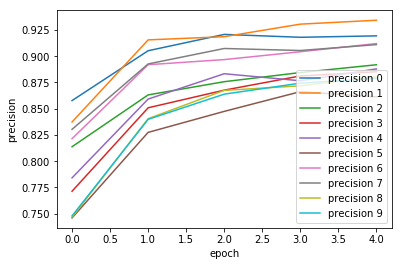

In [16]:
plt.plot(hist.history['prec'], label='precision 0')
plt.plot(hist.history['prec_1'], label='precision 1')
plt.plot(hist.history['prec_2'], label='precision 2')
plt.plot(hist.history['prec_3'], label='precision 3')
plt.plot(hist.history['prec_4'], label='precision 4')
plt.plot(hist.history['prec_5'], label='precision 5')
plt.plot(hist.history['prec_6'], label='precision 6')
plt.plot(hist.history['prec_7'], label='precision 7')
plt.plot(hist.history['prec_8'], label='precision 8')
plt.plot(hist.history['prec_9'], label='precision 9')

plt.xlabel('epoch')
plt.ylabel('precision')
plt.legend(loc='lower right')
plt.show()

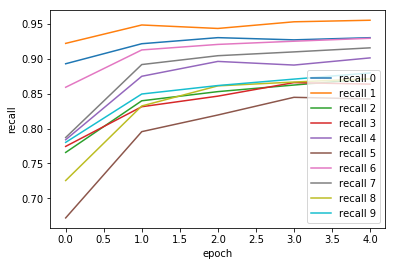

In [15]:
plt.plot(hist.history['recall'], label='recall 0')
plt.plot(hist.history['recall_1'], label='recall 1')
plt.plot(hist.history['recall_2'], label='recall 2')
plt.plot(hist.history['recall_3'], label='recall 3')
plt.plot(hist.history['recall_4'], label='recall 4')
plt.plot(hist.history['recall_5'], label='recall 5')
plt.plot(hist.history['recall_6'], label='recall 6')
plt.plot(hist.history['recall_7'], label='recall 7')
plt.plot(hist.history['recall_8'], label='recall 8')
plt.plot(hist.history['recall_9'], label='recall 9')

plt.xlabel('epoch')
plt.ylabel('recall')
plt.legend(loc='lower right')
plt.show()

In [17]:
# 모델 평가
loss_and_metrics = model.evaluate(X_test, y_test, batch_size=32)
print('## evaluation loss and_metrics ##')
print(loss_and_metrics)

   32/10000 [..............................] - ETA: 38s

 2240/10000 [=====>........................] - ETA: 0s 

 4448/10000 [============>.................] - ETA: 0s

 6720/10000 [===================>..........] - ETA: 0s

 8608/10000 [========================>.....] - ETA: 0s

10000/10000 [==============================] - 0s 37us/step


## evaluation loss and_metrics ##
[0.22322076419889927, 0.939, 0.9365104768753052, 0.9606628576278686, 0.9501333339691163, 0.9609295240402221, 0.9260876197814941, 0.893371430015564, 0.9049180965423584, 0.9226361923217773, 0.9075047631263733, 0.9116000012397766, 0.874963810968399, 0.857881906414032, 0.9185866679191589, 0.92839619140625, 0.9224406352996826, 0.9181257151603699, 0.8994438108444214, 0.9053257154464722, 0.8998730167388916, 0.879645715713501]


In [18]:
import numpy as np

metrics = np.array(loss_and_metrics[2:])
idx = np.linspace(0, 19, 20)
precision = metrics[(idx % 2) == 0]
recall = metrics[(idx + 1) % 2 == 0]

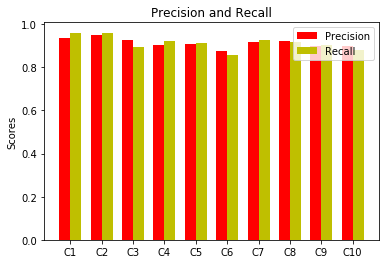

In [19]:
N = 10
ind = np.arange(N)
width = 0.35

fig, ax = plt.subplots()
prec_bar = ax.bar(ind, precision, width, color='r')
recall_bar = ax.bar(ind + width, recall, width, color='y')

ax.set_ylabel('Scores')
ax.set_title('Precision and Recall')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10'))

ax.legend((prec_bar[0], recall_bar[0]), ('Precision', 'Recall'))

plt.show()